# Use Cases

In this notebook we will walk you through $k$-Motiflets unique ability to learn its parameters from the data to discover meaningful motif sets.

# Load required Libraries

### Use Pyattimo

In [29]:
!pip install pyattimo --upgrade

In [30]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.insert(0, "../")

from motiflets.motiflets import *
from motiflets.plotting import *

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}

import warnings
warnings.simplefilter("ignore")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Dataset: ECG heartbeats from the LTAF database


The ECG heartbeats datasets contains a patient's (with ID $71$) heartbeat from the LTAF database. It consists of $3.000$ measurements at $128Hz$ corresponding to roughly $~23s$. The heartbeat rate is around $60$ to $80$ bpm. The TS contains two motifs. It starts with $6$ repetitions of a calibration signal, followed by roughly $16$ full heartbeats.

### References
- [1] https://academic.oup.com/europace/article/9/7/466/553888

Dataset Original Length n:  3000
Dataset Sampled Length n:  3000
../datasets/ground_truth/ecg-heartbeat-av_gt.csv


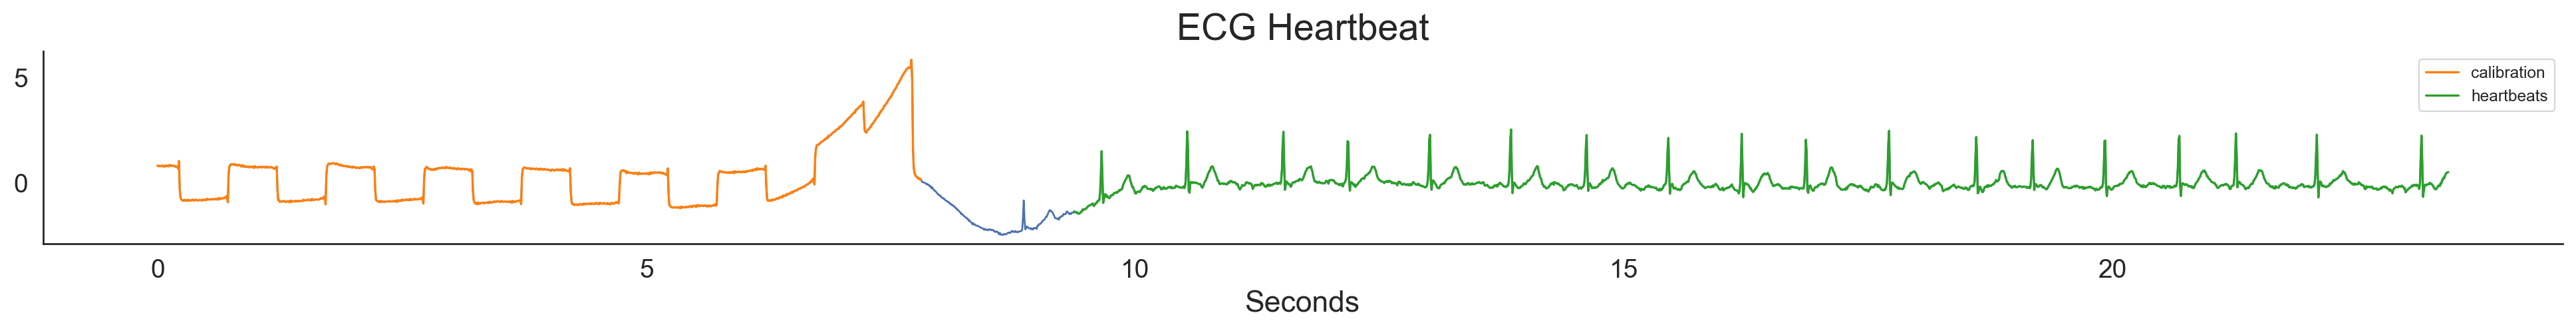

In [49]:
file = 'ecg-heartbeat-av.csv'
ds_name = "ECG Heartbeat"
series, df_gt = read_dataset_with_index(file) 

ml = Motiflets(ds_name, series, df_gt) #  , backend="default"
fig, ax = ml.plot_dataset()

# Known Motifs

There are two motifs: A calibration signal with $6$ repetitions, and the actual heartbeats with around $16$ occurrences.

## First, we learn the motif length l

We find aminimum around $l=0.8s$ to $l=1s$, equal to a heartbeat rate of $60$-$80$ bpm. 

n: 2826 m 175 k 20 support 2
motiflet: [29, 413] extent=0.5854239519753549
n: 2826 m 175 k 20 support 4
motiflet: [29, 157, 285, 413] extent=1.0103975836489885
n: 2826 m 175 k 20 support 3
motiflet: [29, 285, 413] extent=0.7973517198148918
n: 2826 m 175 k 20 support 5
motiflet: [14, 141, 270, 397, 525] extent=3.1216567394269528
n: 2826 m 175 k 20 support 6
motiflet: [14, 141, 270, 397, 525, 654] extent=4.525146725005979
n: 2826 m 175 k 20 support 7
motiflet: [109, 236, 365, 491, 621, 742, 1042] extent=10.73363717862862
n: 2826 m 175 k 20 support 8
motiflet: [21, 148, 276, 404, 533, 663, 1273, 2752] extent=13.710082992144326
n: 2826 m 175 k 20 support 9
motiflet: [13, 141, 267, 399, 529, 652, 1689, 1894, 2743] extent=14.831632144437322
n: 2826 m 175 k 20 support 12
motiflet: [13, 138, 267, 394, 522, 653, 1264, 1583, 1689, 1893, 2182, 2743] extent=15.57191983892851
n: 2826 m 175 k 20 support 11
motiflet: [13, 138, 267, 394, 522, 1264, 1583, 1689, 1893, 2182, 2743] extent=15.5719198389285

[/Users/runner/work/attimo/attimo/src/lsh.rs:756:17] estimated_collisions = 522.5
[/Users/runner/work/attimo/attimo/src/lsh.rs:756:17] estimated_collisions = 430.5


motiflet: [69, 197] extent=0.5041548886147552
n: 2851 m 150 k 20 support 3
motiflet: [38, 166, 422] extent=0.7351244563230814
n: 2851 m 150 k 20 support 4
motiflet: [38, 166, 294, 422] extent=0.9322661783011876
n: 2851 m 150 k 20 support 6
motiflet: [0, 128, 257, 384, 514, 641] extent=3.6397678197293266
n: 2851 m 150 k 20 support 5
motiflet: [115, 243, 371, 500, 628] extent=2.4504326549790387
n: 2851 m 150 k 20 support 7
motiflet: [2, 126, 257, 382, 510, 641, 766] extent=8.088377066038168
n: 2851 m 150 k 20 support 8
motiflet: [1, 126, 254, 379, 510, 638, 765, 1048] extent=9.39924063299111
n: 2851 m 150 k 20 support 9
motiflet: [28, 155, 287, 414, 539, 671, 796, 1163, 1274] extent=12.755270428206565
n: 2851 m 150 k 20 support 12
motiflet: [58, 172, 305, 431, 556, 685, 1296, 1721, 1925, 2107, 2215, 2774] extent=15.136780025622969
n: 2851 m 150 k 20 support 11
motiflet: [64, 189, 311, 448, 575, 700, 893, 1513, 1820, 2220, 2775] extent=14.447013229164188
n: 2851 m 150 k 20 support 10
moti

[/Users/runner/work/attimo/attimo/src/lsh.rs:756:17] estimated_collisions = 421.25
[/Users/runner/work/attimo/attimo/src/lsh.rs:756:17] estimated_collisions = 657.75


n: 2901 m 100 k 20 support 2
motiflet: [116, 244] extent=0.34405936576815477
n: 2901 m 100 k 20 support 3
motiflet: [115, 243, 499] extent=0.48568941954965383
n: 2901 m 100 k 20 support 4
motiflet: [111, 239, 367, 495] extent=0.4806885706109544
n: 2901 m 100 k 20 support 7
motiflet: [37, 165, 293, 421, 549, 677, 805] extent=2.6223610012343244
n: 2901 m 100 k 20 support 6
motiflet: [37, 165, 293, 421, 549, 677] extent=0.9178005848944867
n: 2901 m 100 k 20 support 5
motiflet: [37, 165, 293, 421, 549] extent=0.7959656384590694
n: 2901 m 100 k 20 support 8
motiflet: [45, 173, 300, 429, 557, 685, 813, 1112] extent=5.475616285567723
n: 2901 m 100 k 20 support 9
motiflet: [39, 167, 295, 423, 551, 681, 812, 1104, 1173] extent=6.043025844864951
n: 2901 m 100 k 20 support 10
motiflet: [29, 157, 286, 414, 543, 670, 796, 889, 1102, 1170] extent=6.996618385553029
n: 2901 m 100 k 20 support 11
motiflet: [1087, 1189, 1301, 1618, 1823, 1930, 2027, 2111, 2219, 2333, 2780] extent=9.499971707482047
n: 29

[/Users/runner/work/attimo/attimo/src/lsh.rs:756:17] estimated_collisions = 700.75
[/Users/runner/work/attimo/attimo/src/lsh.rs:756:17] estimated_collisions = 711.75


n: 2951 m 50 k 20 support 8
motiflet: [9, 136, 265, 393, 521, 648, 778, 968] extent=2.935002050679047
n: 2951 m 50 k 20 support 10
motiflet: [18, 147, 657, 1502, 1586, 1694, 1800, 2186, 2580, 2747] extent=3.207064124796591
n: 2951 m 50 k 20 support 9
motiflet: [21, 276, 404, 661, 979, 1505, 1588, 1696, 2750] extent=3.0928128815080673
n: 2951 m 50 k 20 support 12
motiflet: [15, 143, 526, 975, 1500, 1583, 1691, 2004, 2098, 2184, 2480, 2746] extent=3.47410663362041
n: 2951 m 50 k 20 support 11
motiflet: [278, 534, 662, 981, 1507, 1589, 1697, 1803, 1903, 2485, 2581] extent=3.4302469005687923
n: 2951 m 50 k 20 support 17
motiflet: [21, 229, 276, 404, 661, 982, 1051, 1502, 1588, 1800, 1902, 2009, 2100, 2186, 2580, 2750, 2859] extent=4.800840815733469
n: 2951 m 50 k 20 support 16
motiflet: [21, 229, 276, 404, 661, 982, 1502, 1588, 1800, 1902, 2009, 2100, 2186, 2580, 2750, 2859] extent=4.800840815733469
n: 2951 m 50 k 20 support 15
motiflet: [21, 276, 404, 661, 982, 1502, 1588, 1800, 1902, 200

[/Users/runner/work/attimo/attimo/src/lsh.rs:756:17] estimated_collisions = 629.5


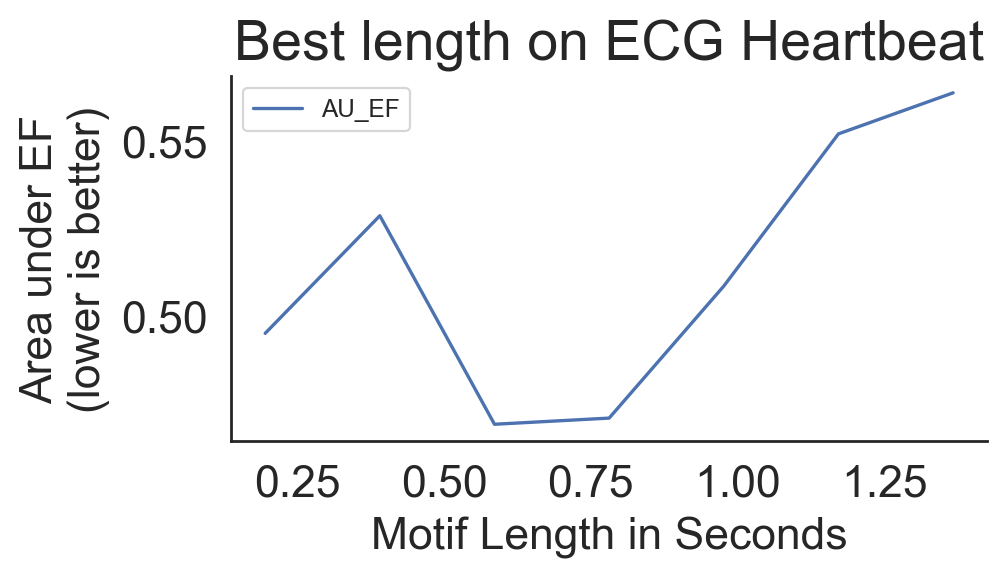

Best motif length 0.5859375 seconds


In [50]:
ks = 20
length_range = np.arange(25,200,25) 
motif_length = ml.fit_motif_length(ks, length_range)
print ("Best motif length", series.index[motif_length], "seconds")

## Next, we learn the size k of the motif set

We plot the similarity of the motifs as a function of the cardinality of $k$-Motiflets to their extent. Elbow points represent large changes in similarity of the found motif set, indicative of a concept change from calibrations signal to heartbeats.

In the following plots, we found two characteristic motifs: calibration waves with $6$ repetitions and heartbeats with $16$ repetitions.

Data 3000
n: 2901 m 100 k 20 support 2
motiflet: [116, 244] extent=0.34405936576815477
n: 2901 m 100 k 20 support 3
motiflet: [115, 243, 499] extent=0.48568941954965383
n: 2901 m 100 k 20 support 4
motiflet: [111, 239, 367, 495] extent=0.4806885706109544
n: 2901 m 100 k 20 support 7
motiflet: [37, 165, 293, 421, 549, 677, 805] extent=2.6223610012343244
n: 2901 m 100 k 20 support 6
motiflet: [37, 165, 293, 421, 549, 677] extent=0.9178005848944867
n: 2901 m 100 k 20 support 5
motiflet: [37, 165, 293, 421, 549] extent=0.7959656384590694
n: 2901 m 100 k 20 support 8
motiflet: [45, 173, 300, 429, 557, 685, 813, 1112] extent=5.475616285567723
n: 2901 m 100 k 20 support 9
motiflet: [39, 167, 295, 423, 551, 681, 812, 1104, 1173] extent=6.043025844864951
n: 2901 m 100 k 20 support 10
motiflet: [29, 157, 286, 414, 543, 670, 796, 889, 1102, 1170] extent=6.996618385553029
n: 2901 m 100 k 20 support 11
motiflet: [1087, 1189, 1301, 1618, 1823, 1930, 2027, 2111, 2219, 2333, 2780] extent=9.49997170748

[/Users/runner/work/attimo/attimo/src/lsh.rs:756:17] estimated_collisions = 657.75


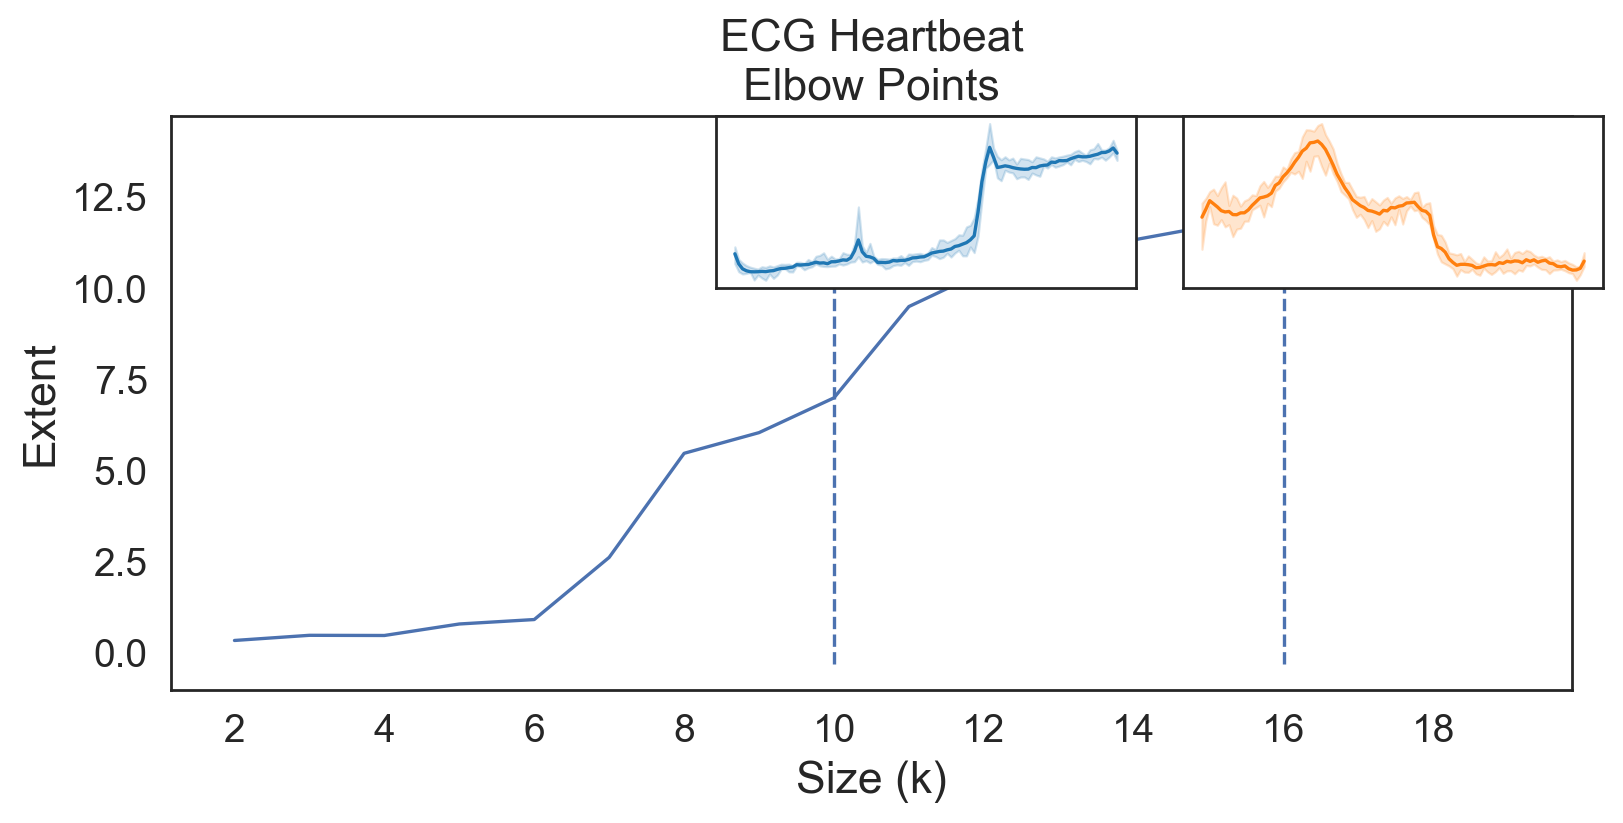

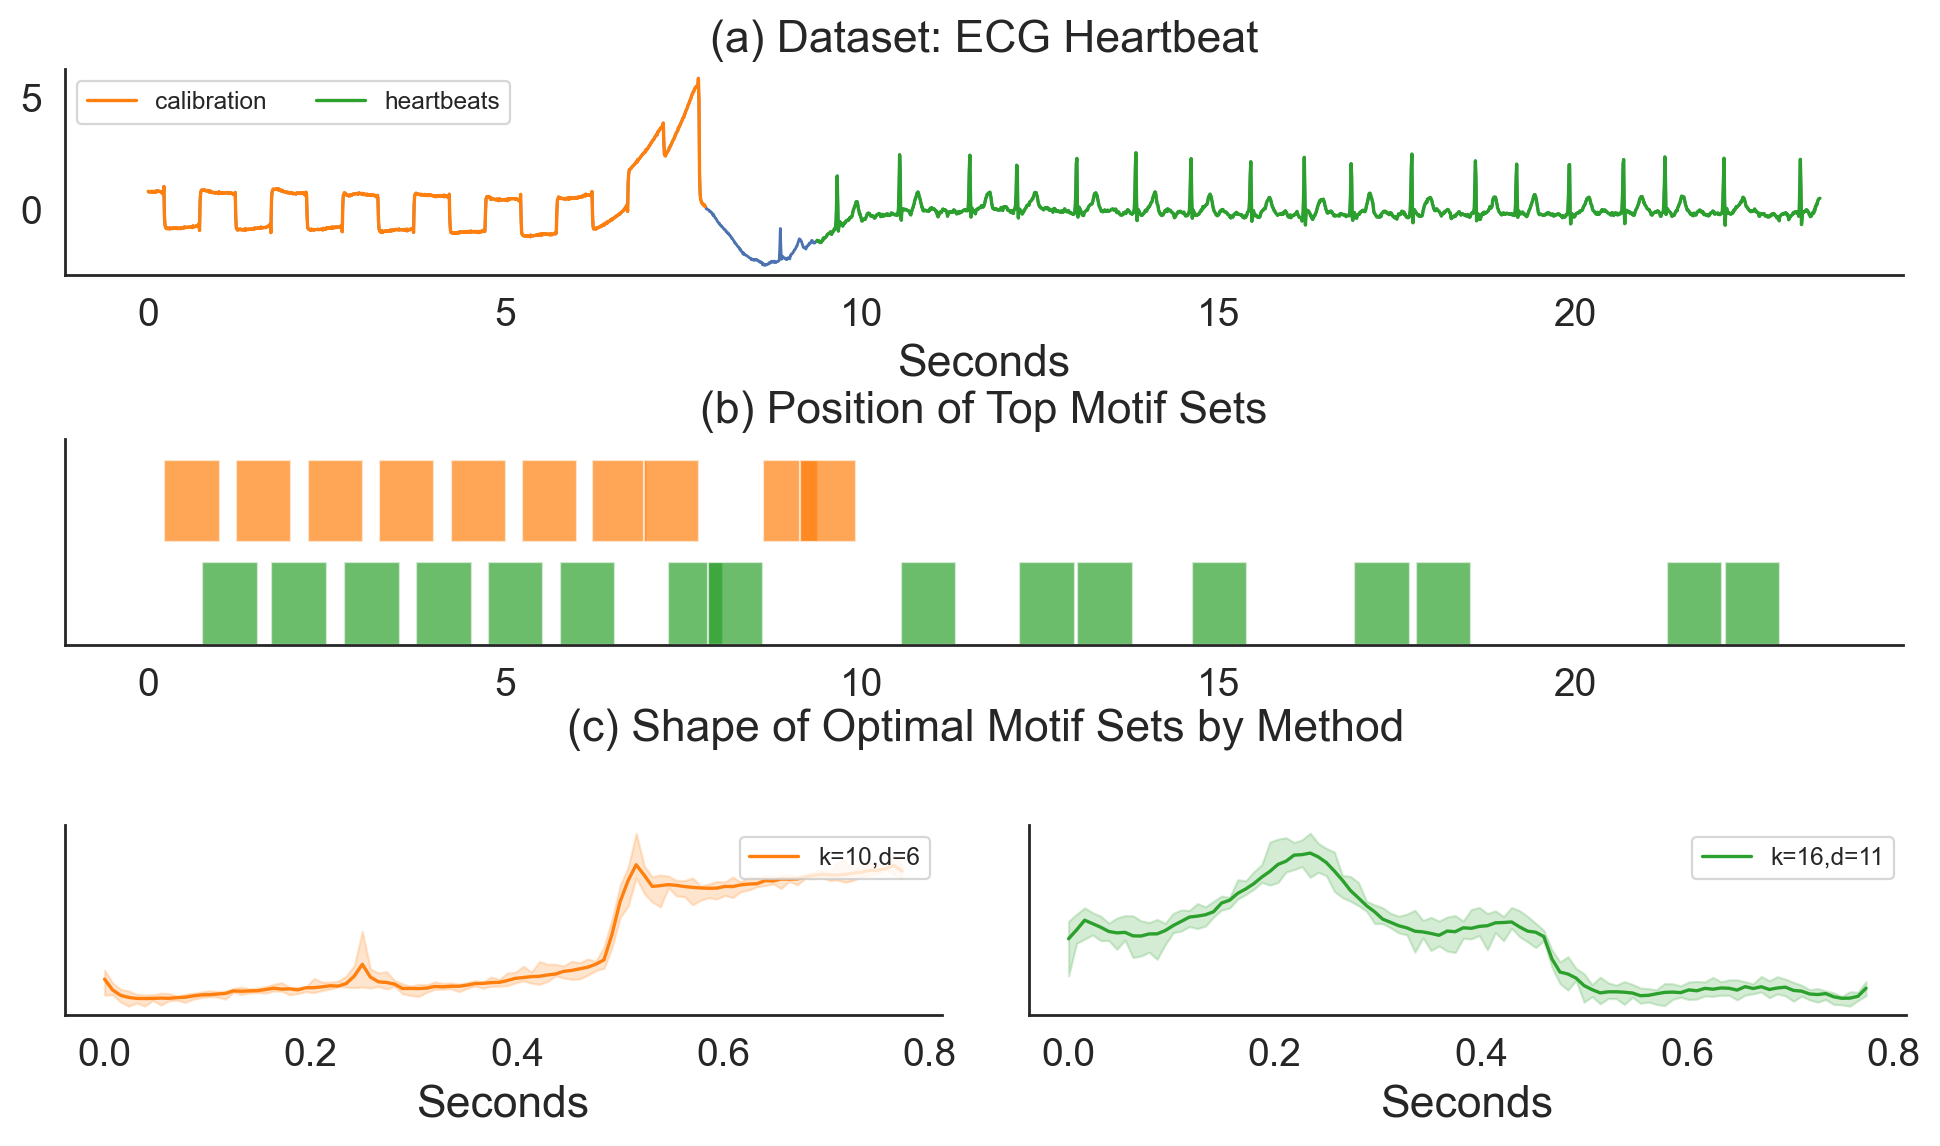

In [52]:
# print(motif_length)
motif_length = 100
dists, candidates, elbow_points = ml.fit_k_elbow(ks, motif_length)

<hr>

# Dataset: Muscle Activation Dataset

The Muscle Activation dataset was collected from professional in-line speed skating on a large motor driven treadmill with Electromyography (EMG) data of multiple movements. It consists of $29.899$ measurements at $100Hz$ corresponding to $30s$ in total. The known motifs are the muscle movement and a recovery phase.

### References
- [1] https://link.springer.com/content/pdf/10.1007/s10618-007-0070-1.pdf
- [2] http://www.cs.ucr.edu/~eamonn/iSAX/iSAX.html

Dataset Original Length n:  14950
Dataset Sampled Length n:  14950
../datasets/ground_truth/muscle_activation_gt.csv


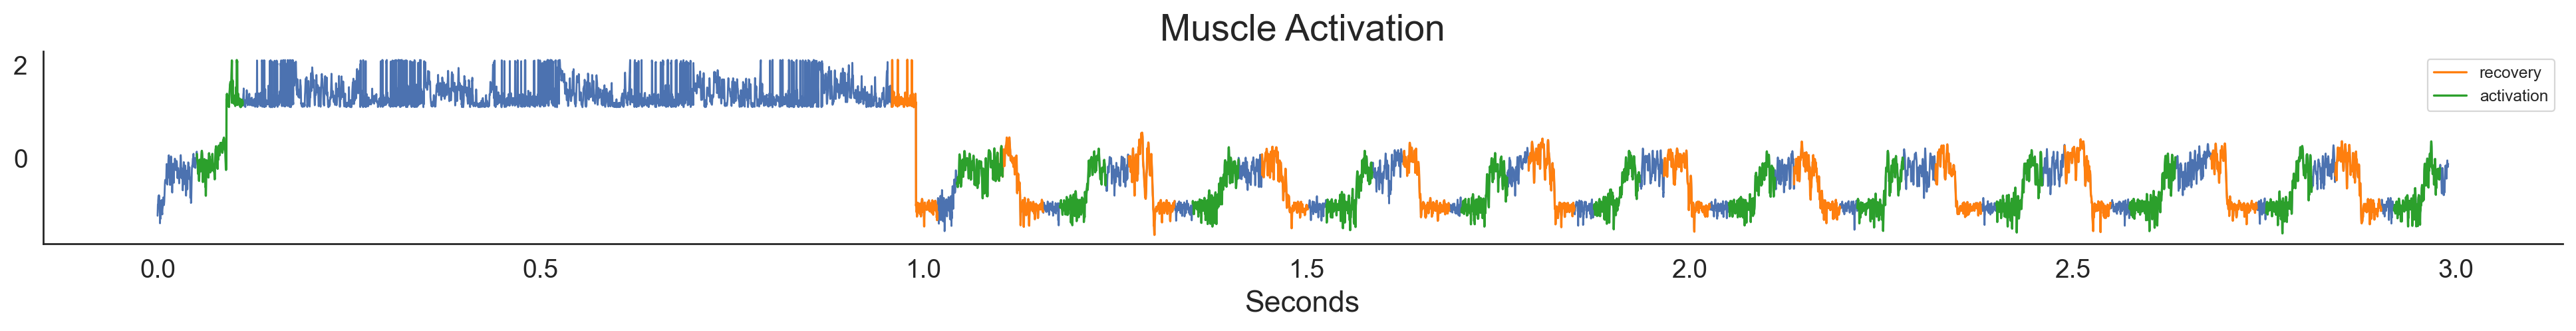

In [36]:
file = 'muscle_activation.csv'
ds_name = "Muscle Activation"
series, df_gt = read_dataset_with_index(file) 

ml = Motiflets(ds_name, series, df_gt)
fig, ax = ml.plot_dataset()

# Known Motifs

The known motifs are the muscle movement activation and a recovery phase of the Gluteus Maximus muscle and have $13$ and $12$ occurrences, respectively.

## First, we learn the motif length l

We find a minimum around $l=0.8s$ to $l=1s$, equal to a heartbeat rate of $60$-$80$ bpm. 

[/Users/runner/work/attimo/attimo/src/lsh.rs:756:17] estimated_collisions = 200.75
[/Users/runner/work/attimo/attimo/src/lsh.rs:756:17] estimated_collisions = 111.75
[/Users/runner/work/attimo/attimo/src/lsh.rs:756:17] estimated_collisions = 184.25
[/Users/runner/work/attimo/attimo/src/lsh.rs:756:17] estimated_collisions = 157.25


	Time 51.0 s


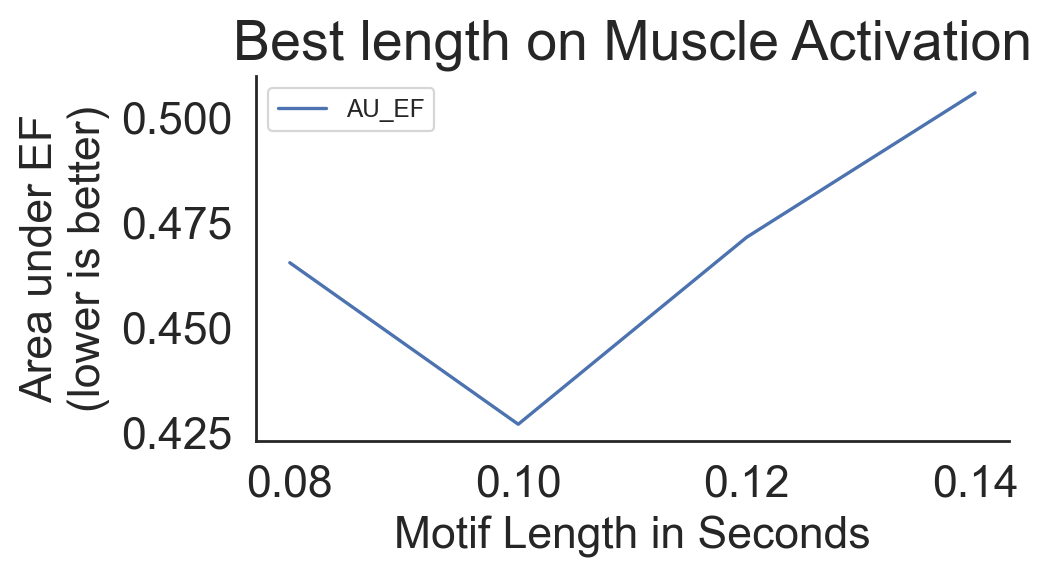

Found motif length 500


In [37]:
k = 13
length_range = np.arange(400,701,100) 

motif_length = ml.fit_motif_length(k, length_range)
print ("Found motif length", motif_length)

## Top-1 k-Motiflets

We find the recovery phase with $12$ occurences as TOP-1 motif

Data 14950
n: 14451 m 500 k 13 support 2
motiflet: [8059, 13327] extent=7.689603611581421


[/Users/runner/work/attimo/attimo/src/lsh.rs:756:17] estimated_collisions = 184.25


n: 14451 m 500 k 13 support 3
motiflet: [8080, 9832, 13348] extent=8.336256862350295
n: 14451 m 500 k 13 support 4
motiflet: [5465, 8078, 11577, 12459] extent=8.856977518264534
n: 14451 m 500 k 13 support 5
motiflet: [4755, 5433, 8050, 8921, 13310] extent=9.358319403643632
n: 14451 m 500 k 13 support 6
motiflet: [4757, 8046, 8919, 12423, 13310, 14179] extent=9.483468591812146
n: 14451 m 500 k 13 support 7
motiflet: [4763, 5436, 8056, 8921, 12431, 13313, 14186] extent=9.985778980535722
n: 14451 m 500 k 13 support 8
motiflet: [4764, 5442, 8057, 8932, 11560, 12440, 13324, 14190] extent=10.229631355031584
n: 14451 m 500 k 13 support 9
motiflet: [4792, 5464, 8079, 8956, 9832, 11568, 12457, 13348, 14213] extent=10.794388457498222
n: 14451 m 500 k 13 support 10
motiflet: [4783, 5464, 7201, 8064, 8952, 9844, 11564, 12449, 13342, 14205] extent=11.084583508821643
n: 14451 m 500 k 13 support 11
motiflet: [4776, 5444, 7191, 8066, 8937, 9829, 10664, 11571, 12443, 13323, 14196] extent=11.23752632746

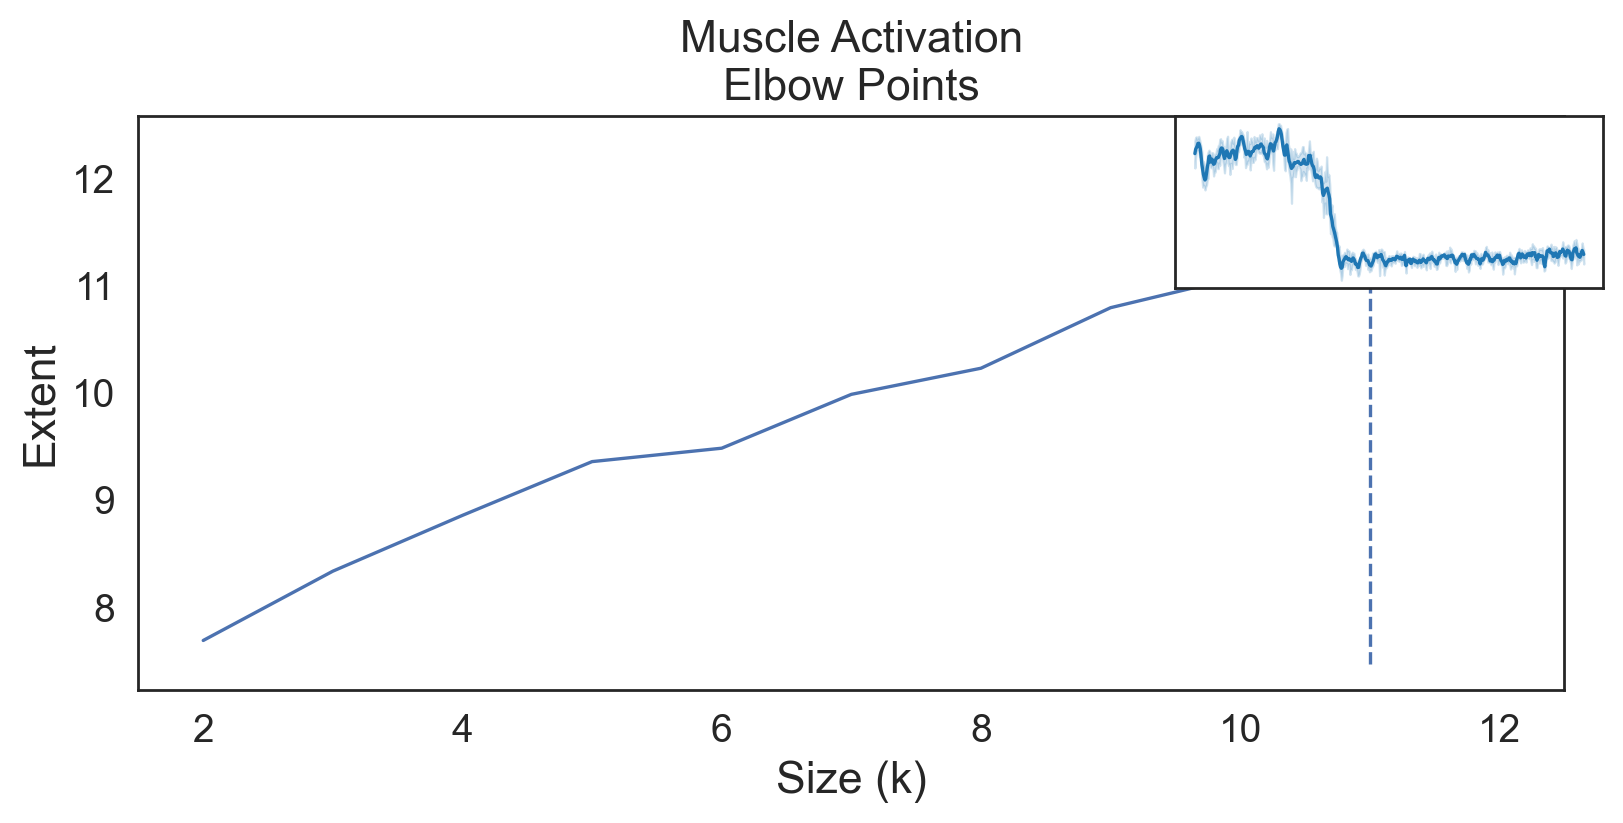

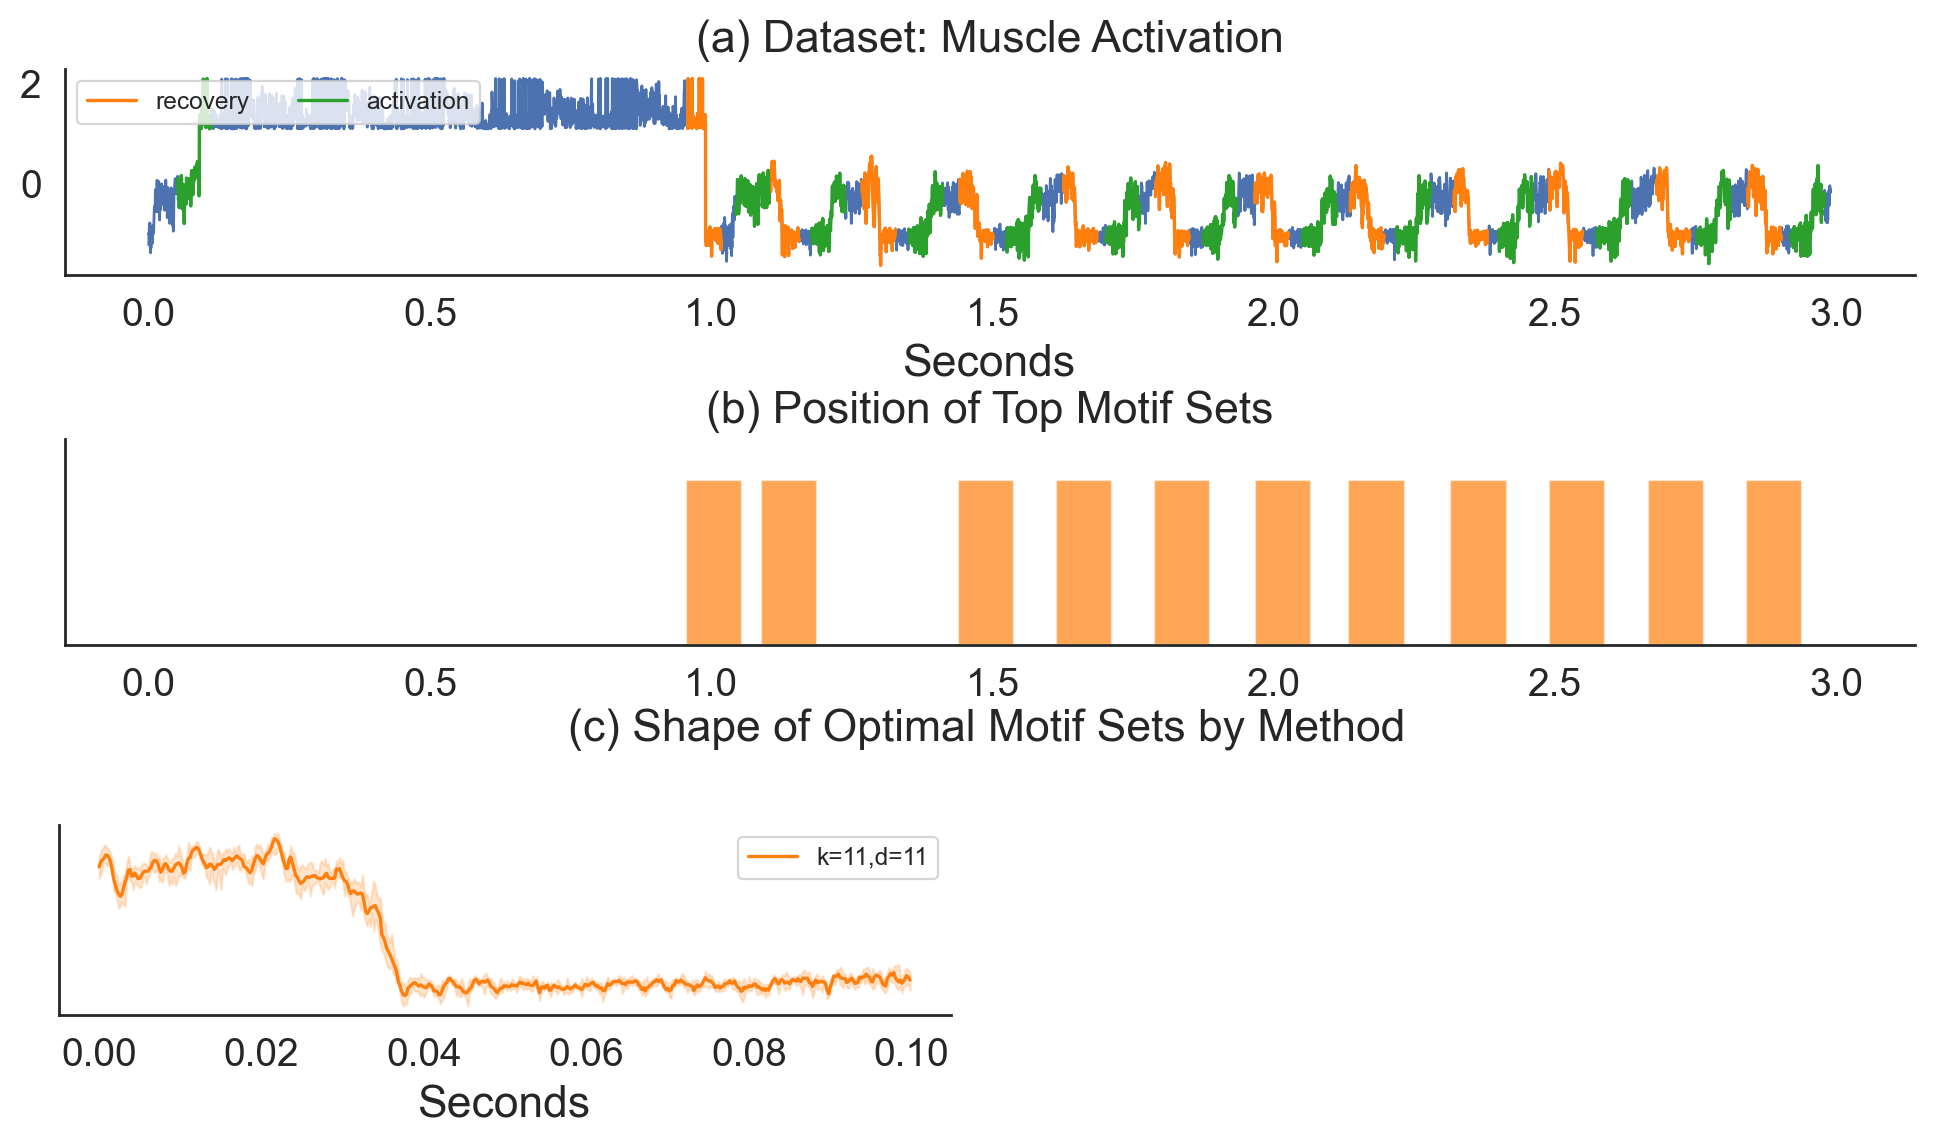

In [38]:
dists, candidates, elbow_points = ml.fit_k_elbow(k, motif_length)

<hr>

# Dataset: Physiodata - EEG sleep data
    
This Physiodata - EEG sleep dataset contains a recording of an afternoon nap of a healthy, nonsmoking person, between 20 to 40 years old. Data was recorded with an extrathoracic strain belt. The dataset consists of $269.286$ points at $100hz$ corresponding to $45min$. Known motifs are so-called sleep spindles and $k$-complexes.

### References:
- [1] https://link.springer.com/content/pdf/10.1007/s004220000144.pdf
- [2] https://epubs.siam.org/doi/pdf/10.1137/1.9781611972795.41

Dataset Original Length n:  10358
Dataset Sampled Length n:  10358


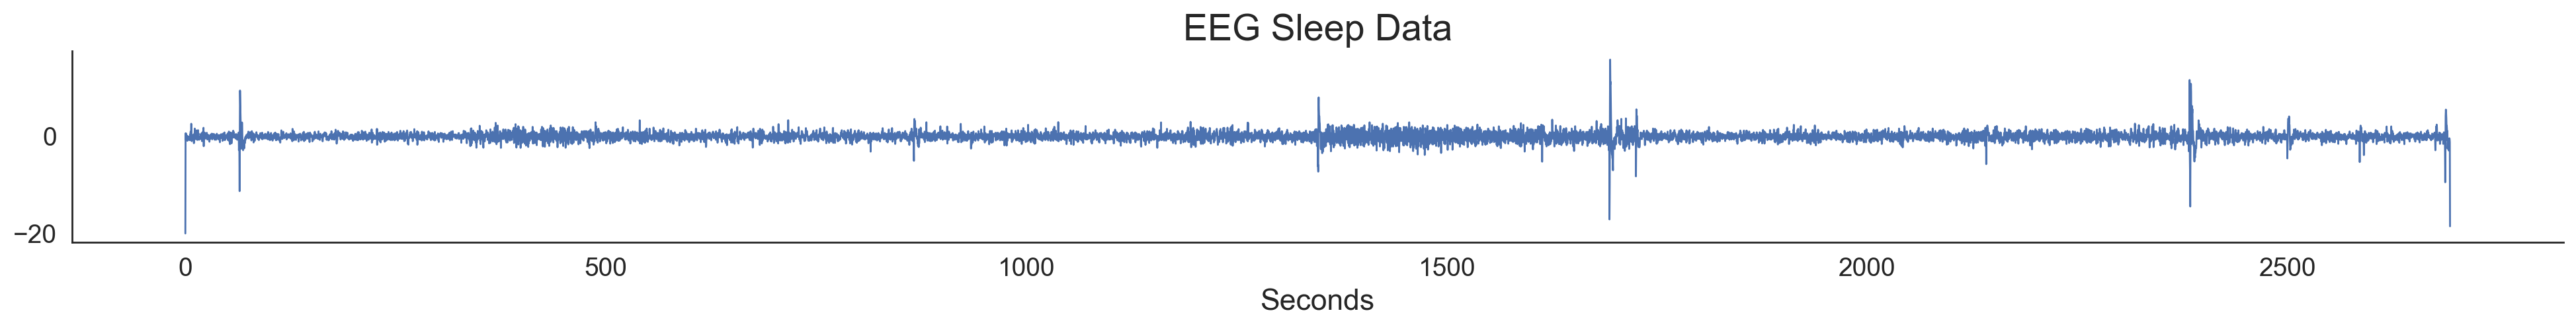

In [20]:
file = 'npo141.csv' # Dataset Length n:  269286
ds_name="EEG Sleep Data"
series = read_dataset_with_index(file)

ml = Motiflets(ds_name, series)
fig, ax = ml.plot_dataset()

# Known Motifs in Stage 2 sleep phases


<img src="https://upload.wikimedia.org/wikipedia/commons/7/71/Stage2sleep_new.svg">

This data set contains two main motifs: the K-Complex and  sleep spindles, two characteristic markers of stage 2 sleep.

## We learn the size k of the motif set

We plot the similarity of the motifs as a function of the cardinality of $k$-Motiflets to their extent. Elbow points represent large changes in similarity of the found motif set, indicative of a concept change from calibrations signal to heartbeats.

In the following plots, we found two characteristic motifs: calibration waves with $6$ repetitions and heartbeats with $16$ repetitions.

[/Users/runner/work/attimo/attimo/src/lsh.rs:756:17] estimated_collisions = 5222.25
[/Users/runner/work/attimo/attimo/src/lsh.rs:756:17] estimated_collisions = 4874.0
[/Users/runner/work/attimo/attimo/src/lsh.rs:756:17] estimated_collisions = 4916.5
[/Users/runner/work/attimo/attimo/src/lsh.rs:756:17] estimated_collisions = 5351.5
[/Users/runner/work/attimo/attimo/src/lsh.rs:756:17] estimated_collisions = 5517.75
[/Users/runner/work/attimo/attimo/src/lsh.rs:756:17] estimated_collisions = 5068.5
[/Users/runner/work/attimo/attimo/src/lsh.rs:756:17] estimated_collisions = 4974.0
[/Users/runner/work/attimo/attimo/src/lsh.rs:756:17] estimated_collisions = 5704.75
[/Users/runner/work/attimo/attimo/src/lsh.rs:756:17] estimated_collisions = 5422.0
[/Users/runner/work/attimo/attimo/src/lsh.rs:756:17] estimated_collisions = 5073.0
[/Users/runner/work/attimo/attimo/src/lsh.rs:756:17] estimated_collisions = 4620.0
[/Users/runner/work/attimo/attimo/src/lsh.rs:756:17] estimated_collisions = 5851.5
[

	Time 23.3 s


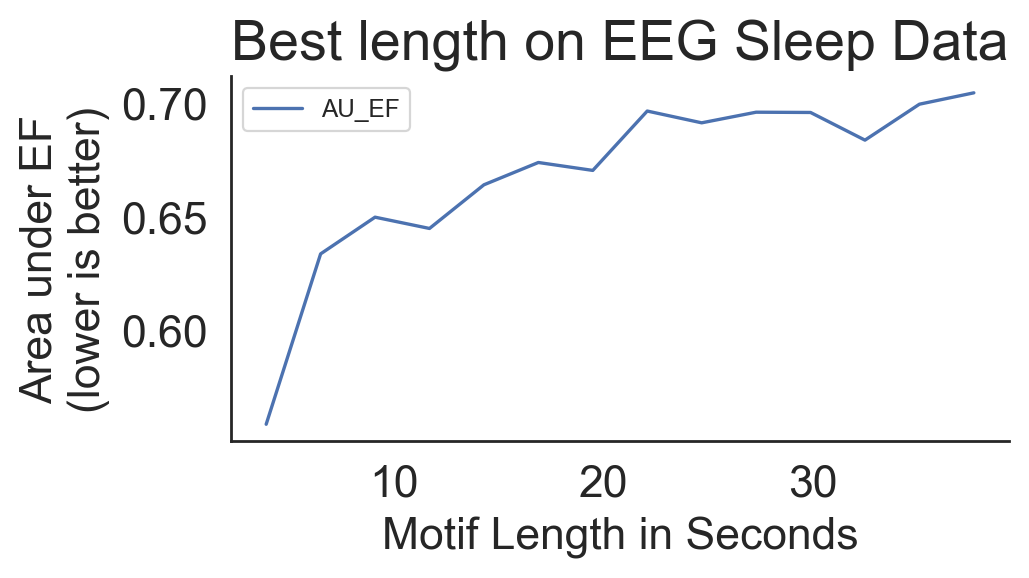

In [21]:
ks = 20
length_range = np.arange(15,151,10)
motif_length = ml.fit_motif_length(ks, length_range)

The dataset has many minima. We chose $l=25$ in the following, as it is a good value for both interesting motifs.

## We learn the size k of the motif set

We plot the similarity of the motifs as a function of the cardinality of $k$-Motiflets to their extent. Elbow points represent large changes in similarity of the found motif set, indicative of a concept change from calibrations signal to heartbeats.

In the following plots, we found two characteristic motifs: 
sleep spindles with k=15 repetitions and K-komplexes with k=13 repetitions.

Data 10358


[/Users/runner/work/attimo/attimo/src/lsh.rs:756:17] estimated_collisions = 5222.25


Chosen window-size: 145 in 9.4 s
Elbow Points [15 17]


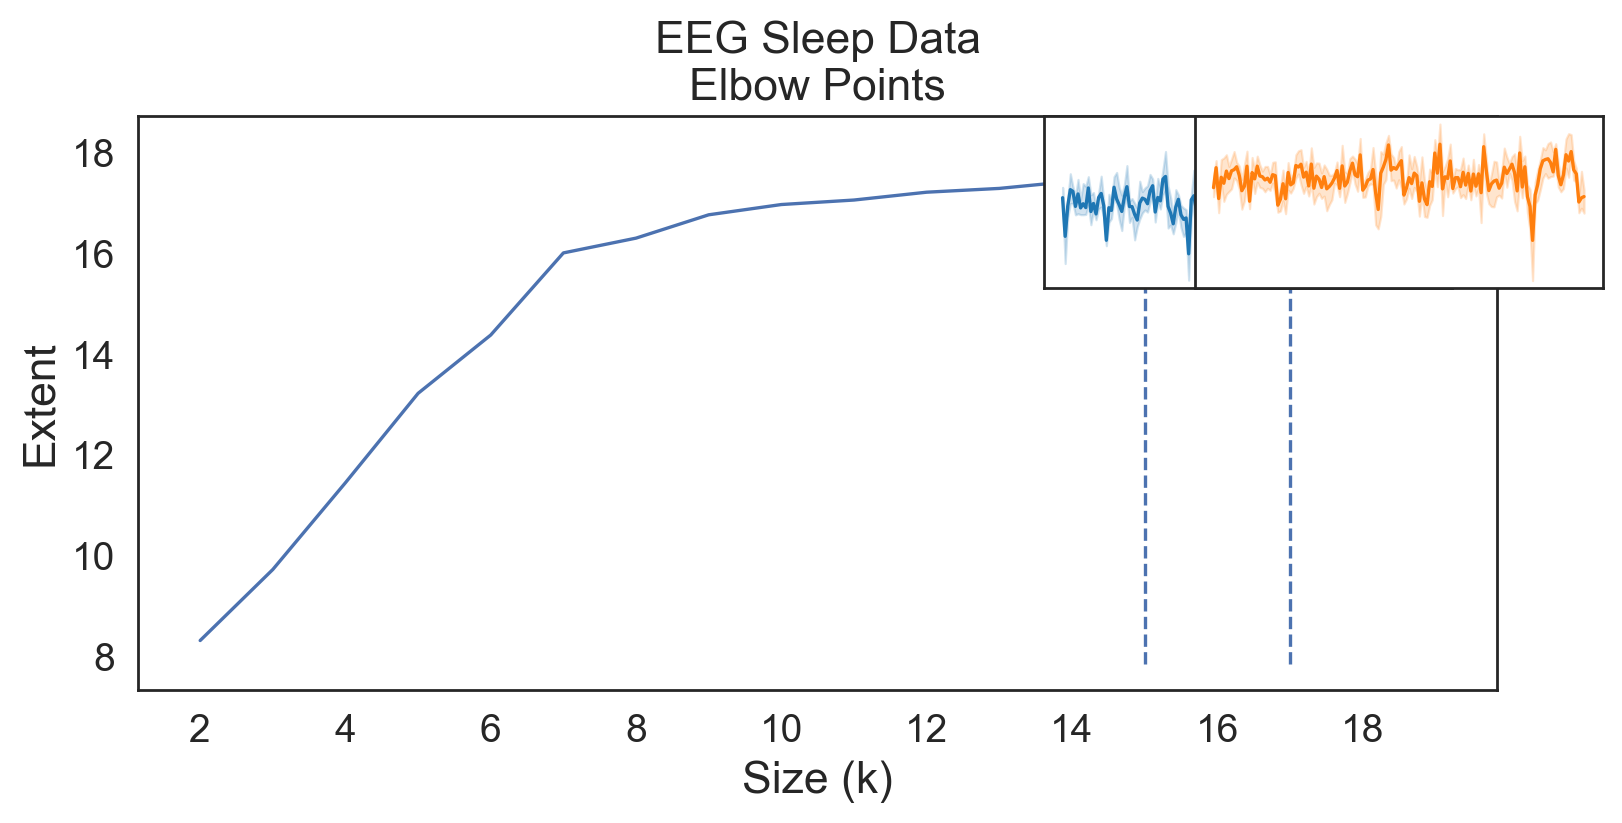

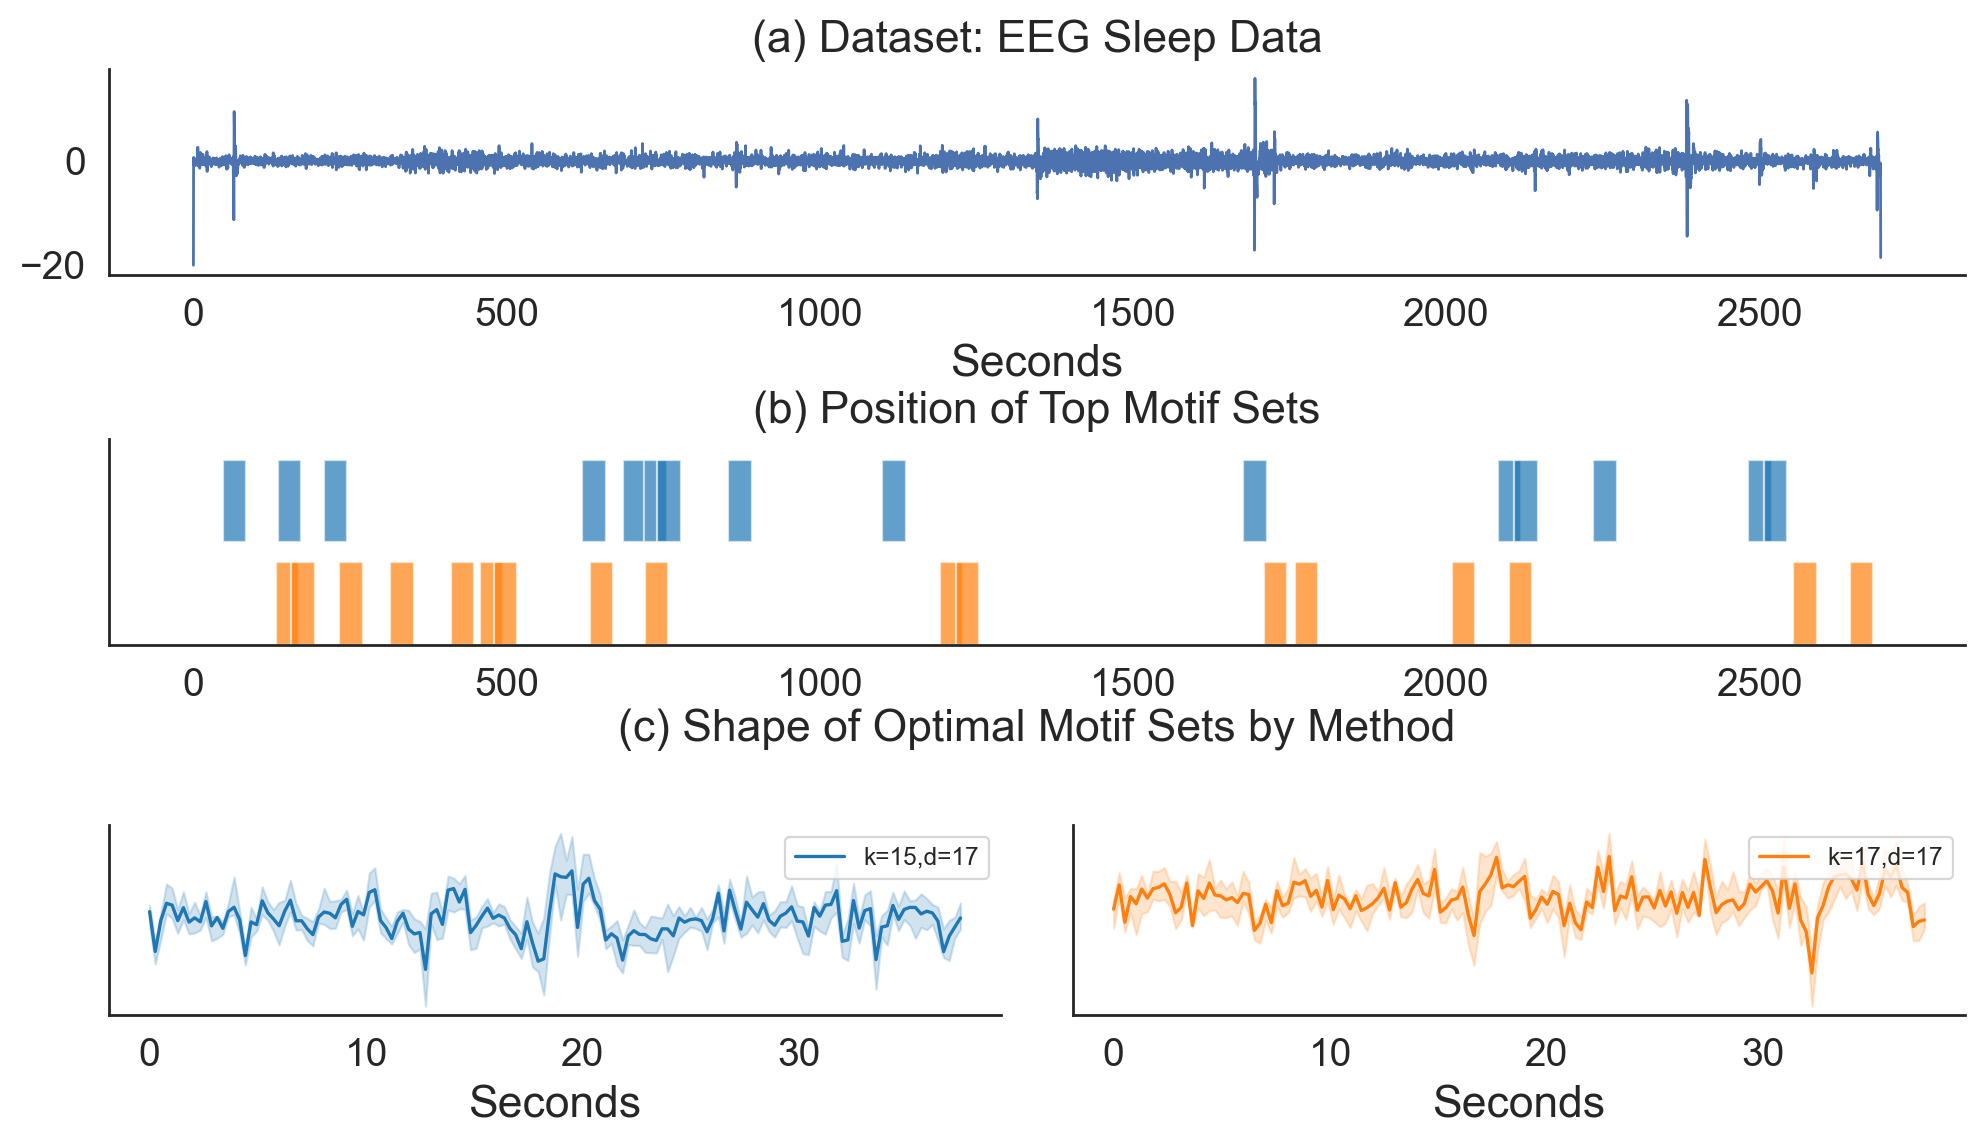

In [23]:
# motif_length=145
dists, candidates, elbow_points = ml.fit_k_elbow(ks, motif_length)

In [24]:
# dists[6]
print(np.sort(candidates[6]))

from motiflets.motiflets import compute_distances_full, get_pairwise_extent

pos = [125, 6391, 10212, 5058, 9046, 3209]
D_full = compute_distances_full(series.to_numpy(), 145)
print(np.sqrt(get_pairwise_extent(D_full, pos)))

[2783 3280 5129 6462 9117 9893]
11.514384685579165


<hr>

# Dataset: Winding

Industrial Winding Process is a snapshot of a process where a plastic web is unwound from a first reel (unwinding reel), goes over the second traction reel and is finally rewound on the the third rewinding reel. The recordings correspond to the traction of the second reel angular speed. The data contains $2.500$ points sampled at $0.1s$, corresponding to $250s$.

### References 
- [1] https://homes.esat.kuleuven.be/~tokka/daisydata.html
- [2] https://grammarviz2.github.io/grammarviz2_site/morea/motif/experience-m1.html

Dataset Original Length n:  2499
Dataset Sampled Length n:  2499


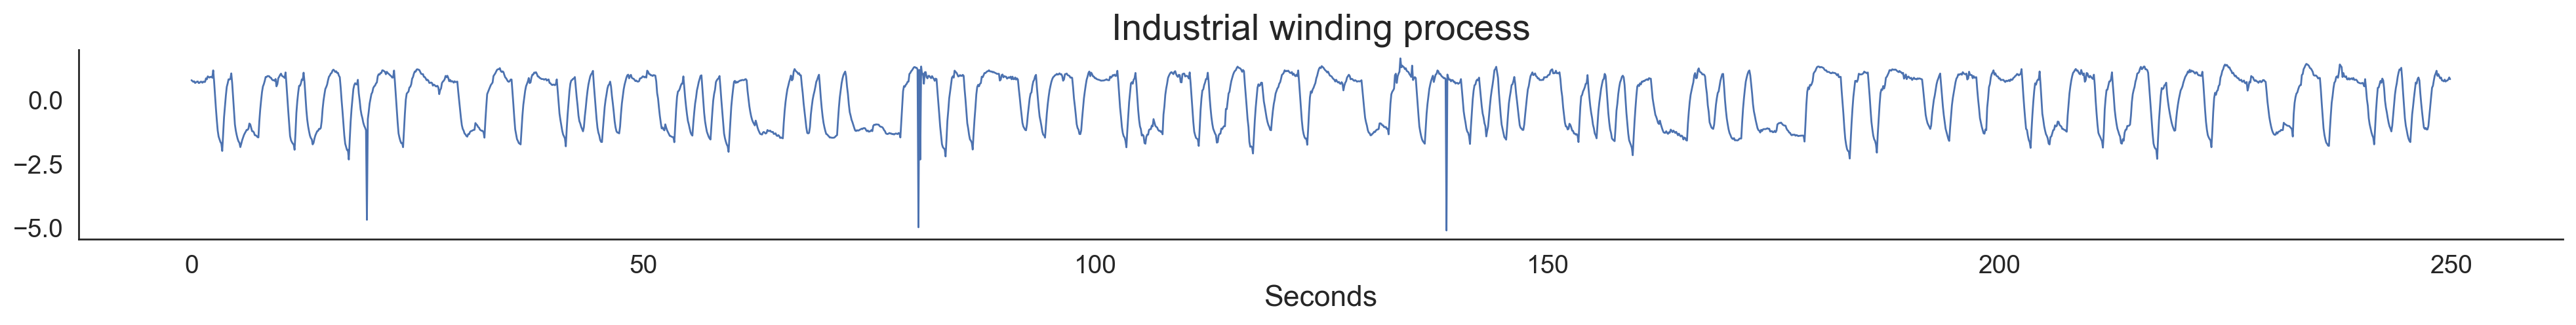

In [13]:
file = "winding_col.csv"
ds_name = "Industrial winding process"
series = read_dataset_with_index(file)

ml = Motiflets(ds_name, series)
fig, ax = ml.plot_dataset()

# Known Motifs

 No documented motifs exist.

## First, we learn the motif length l

We find aminimum around $l=6s$, equal to 60 data points.

[/Users/runner/work/attimo/attimo/src/lsh.rs:756:17] estimated_collisions = 273.25
[/Users/runner/work/attimo/attimo/src/lsh.rs:756:17] estimated_collisions = 212.5
[/Users/runner/work/attimo/attimo/src/lsh.rs:756:17] estimated_collisions = 319.0
[/Users/runner/work/attimo/attimo/src/lsh.rs:756:17] estimated_collisions = 351.25
[/Users/runner/work/attimo/attimo/src/lsh.rs:756:17] estimated_collisions = 362.0
[/Users/runner/work/attimo/attimo/src/lsh.rs:756:17] estimated_collisions = 376.25
[/Users/runner/work/attimo/attimo/src/lsh.rs:756:17] estimated_collisions = 458.5
[/Users/runner/work/attimo/attimo/src/lsh.rs:756:17] estimated_collisions = 933.5


	Time 0.5 s


[/Users/runner/work/attimo/attimo/src/lsh.rs:756:17] estimated_collisions = 149.0


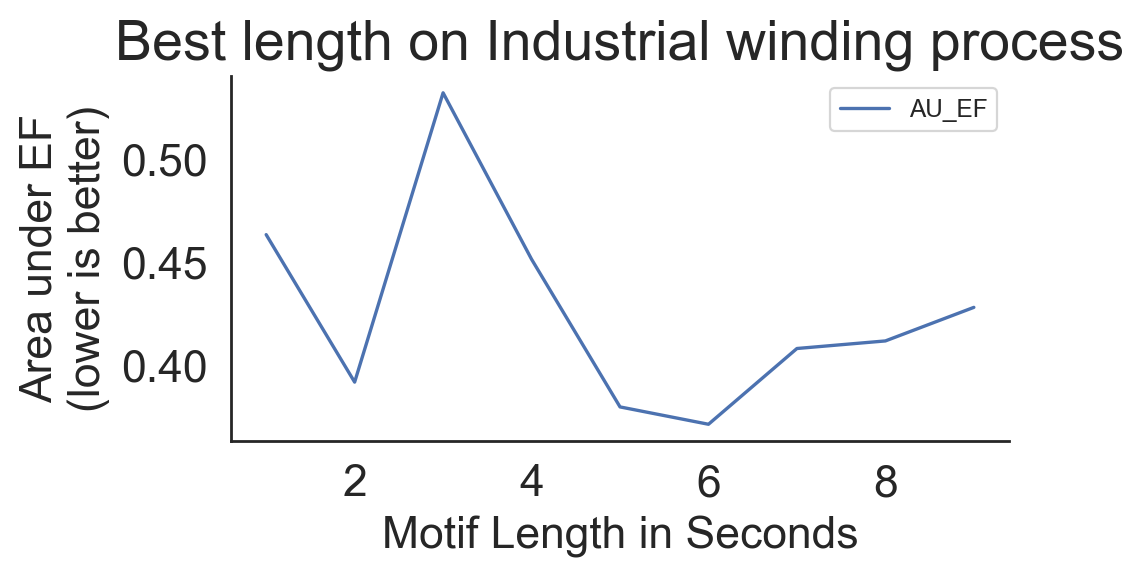

In [14]:
ks = 12
length_range = np.arange(10,100,10)

motif_length = ml.fit_motif_length(ks, length_range)

# Top-1 Motiflets

[/Users/runner/work/attimo/attimo/src/lsh.rs:756:17] estimated_collisions = 351.25


Data 2499
Chosen window-size: 60 in 0.1 s
Elbow Points [4 7]


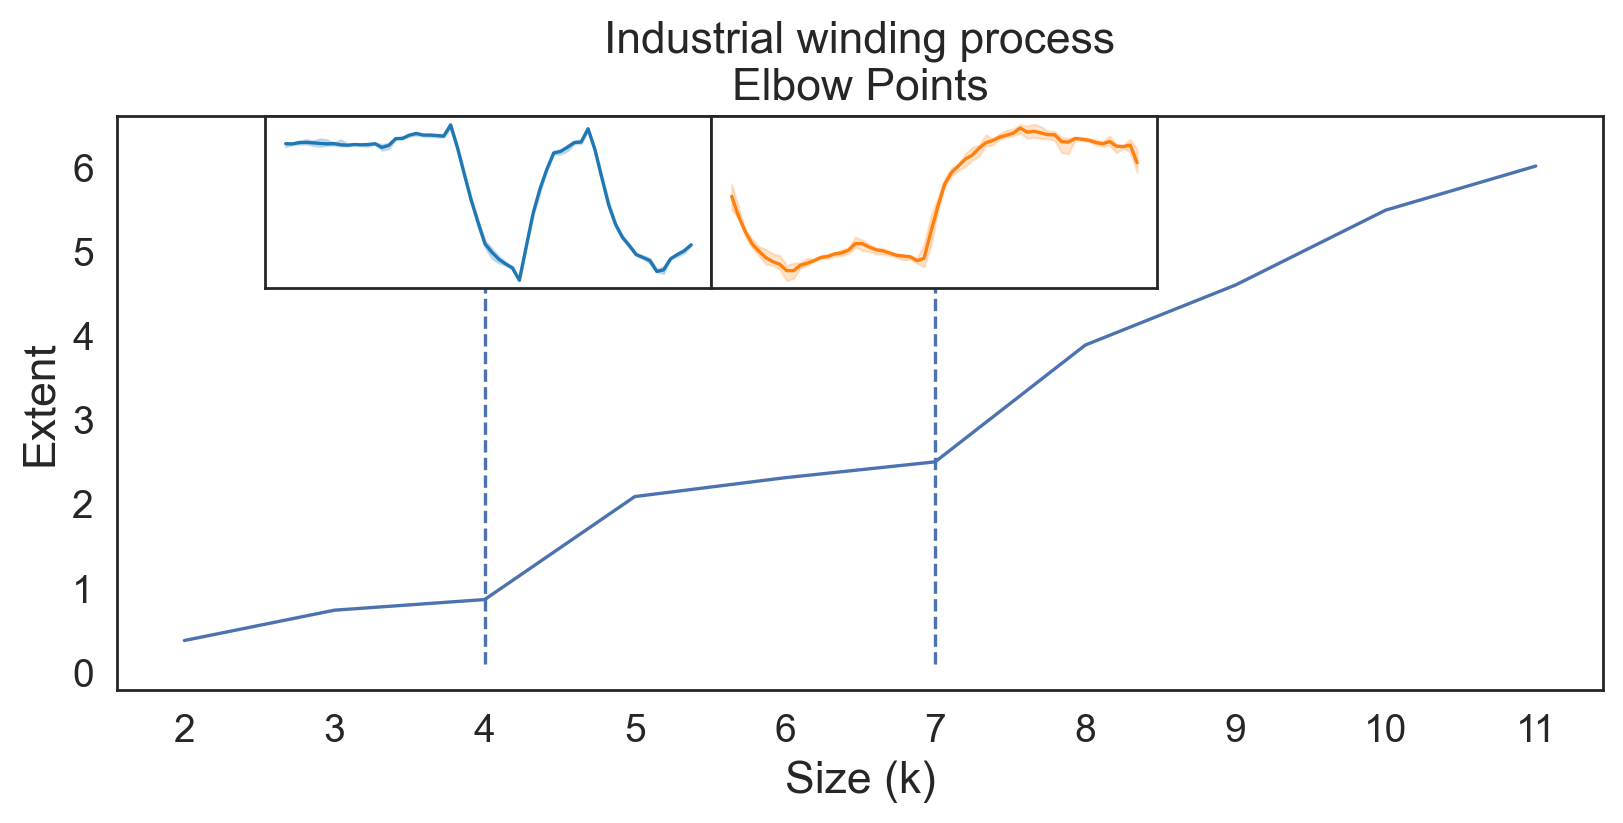

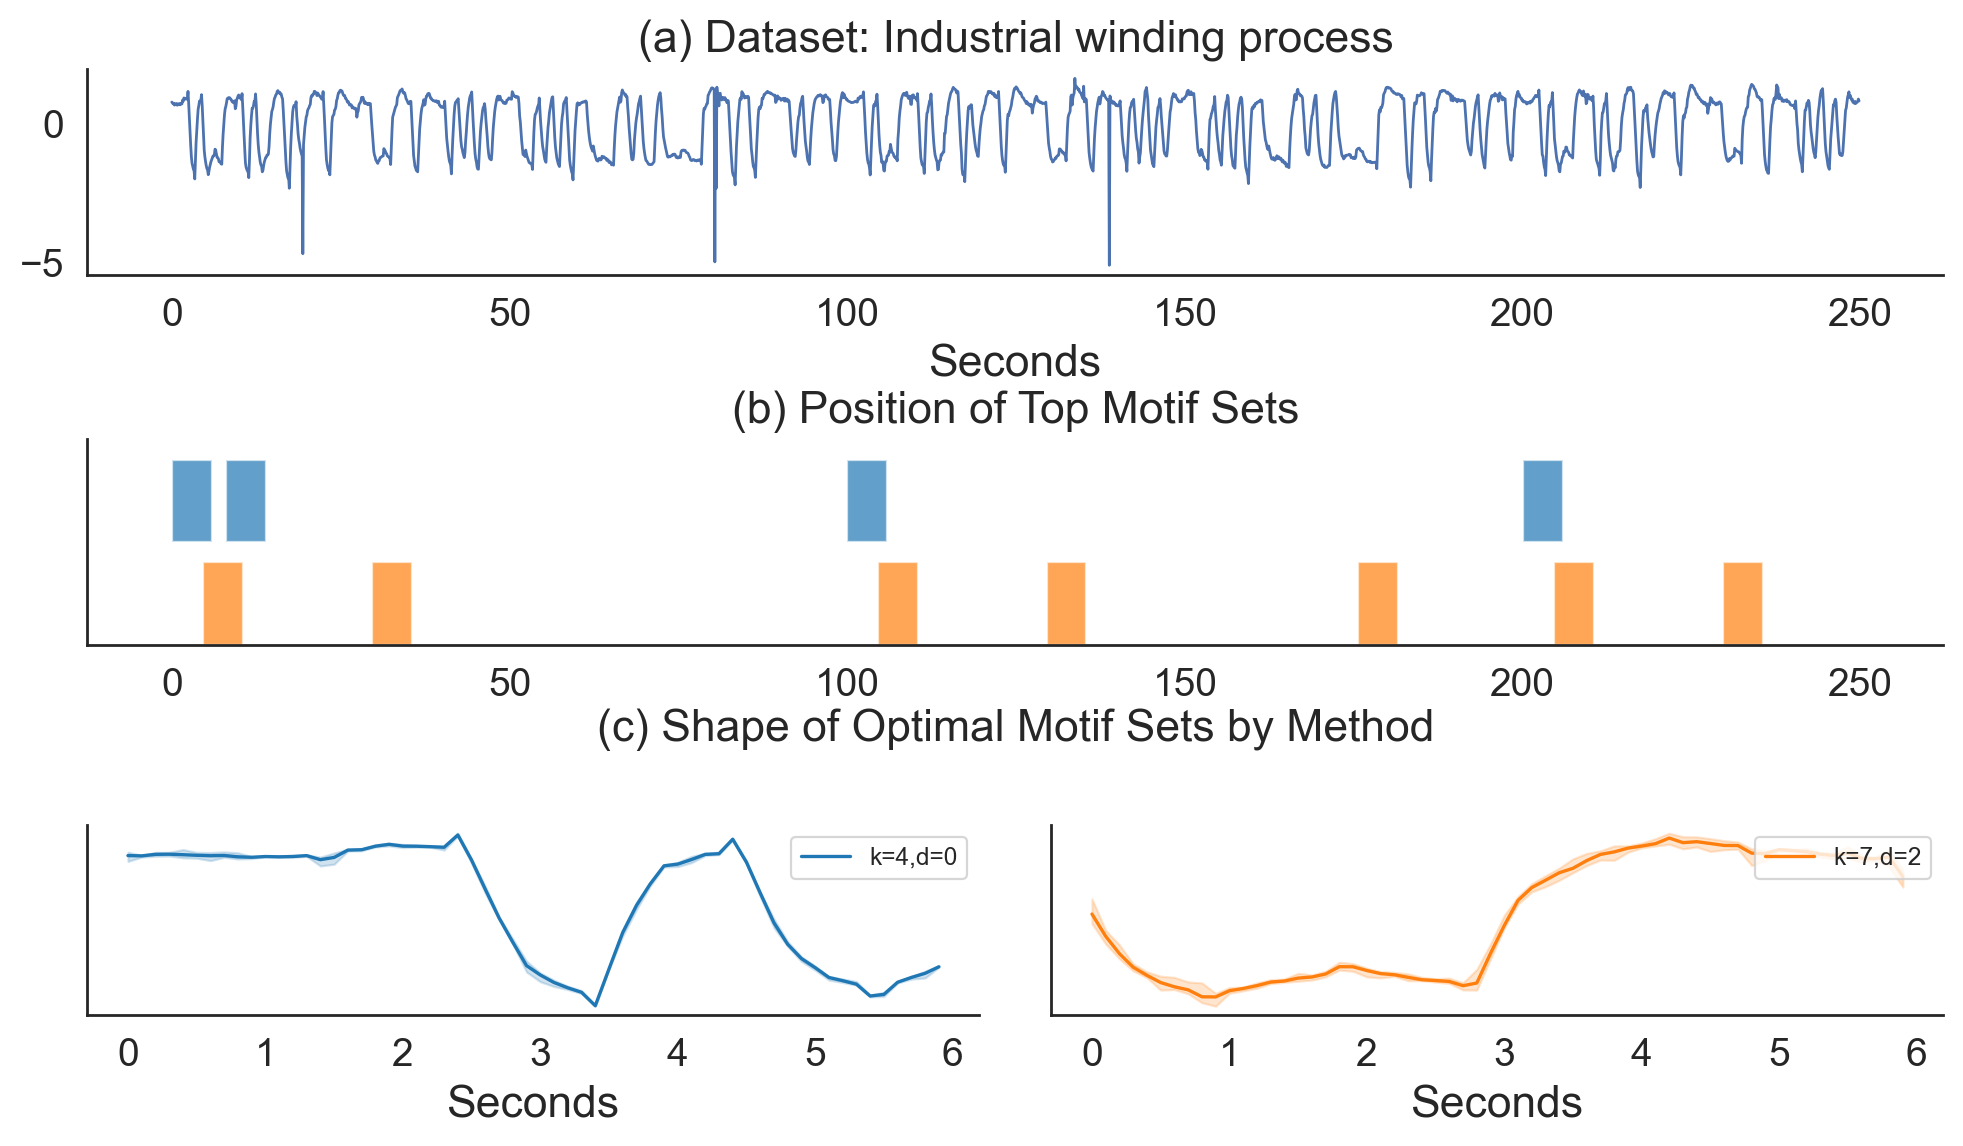

In [15]:
dists, candidates, elbow_points = ml.fit_k_elbow(ks, motif_length)

# Top-2 Motiflet

Data 2499
Chosen window-size: 60 in 0.1 s
Elbow Points [3 7]


[/Users/runner/work/attimo/attimo/src/lsh.rs:756:17] estimated_collisions = 351.25


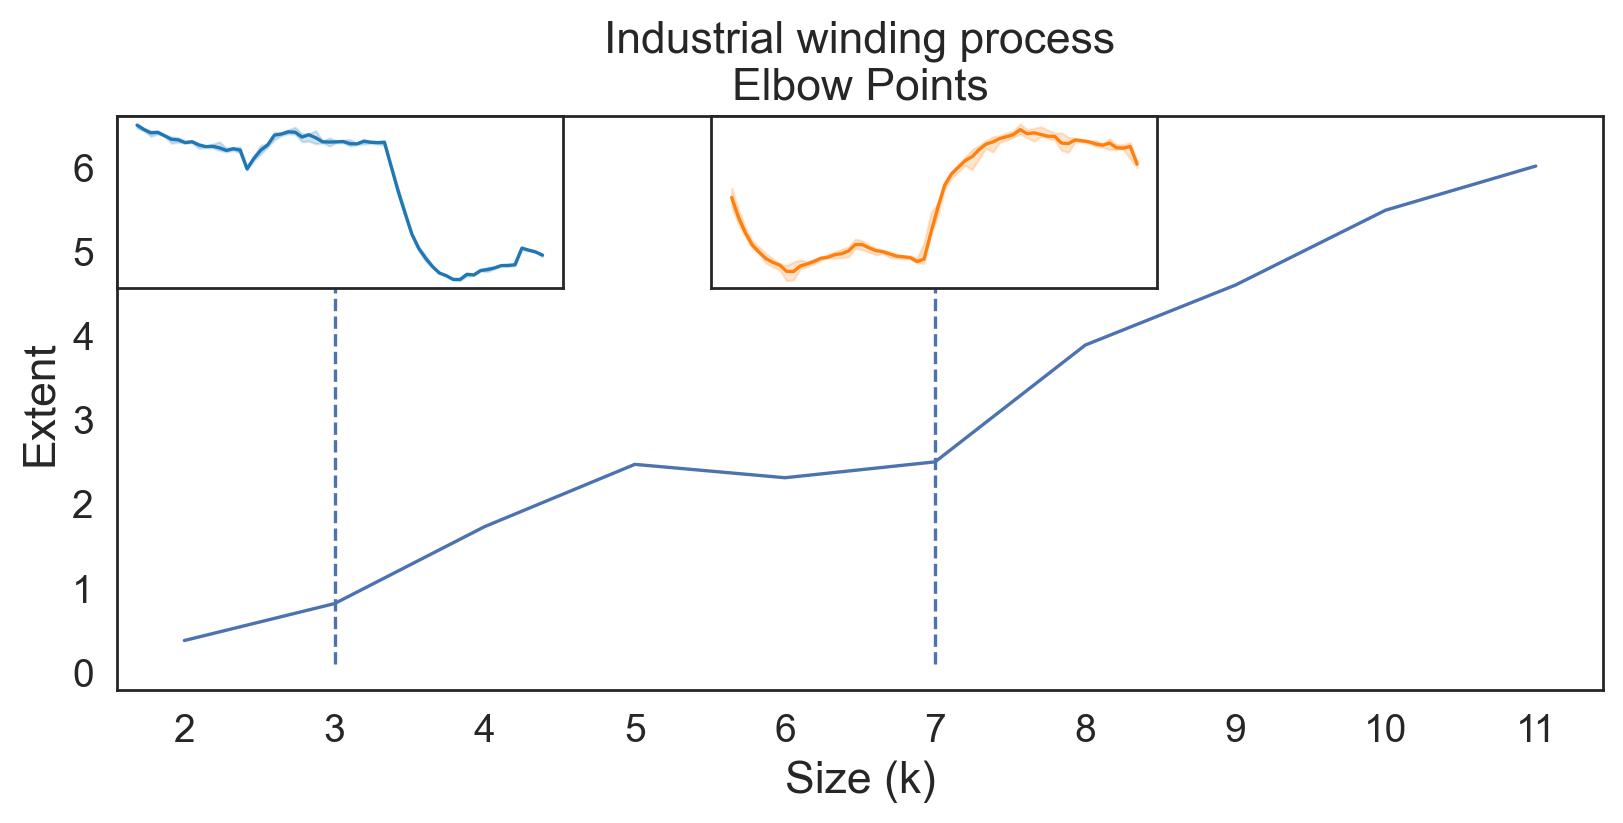

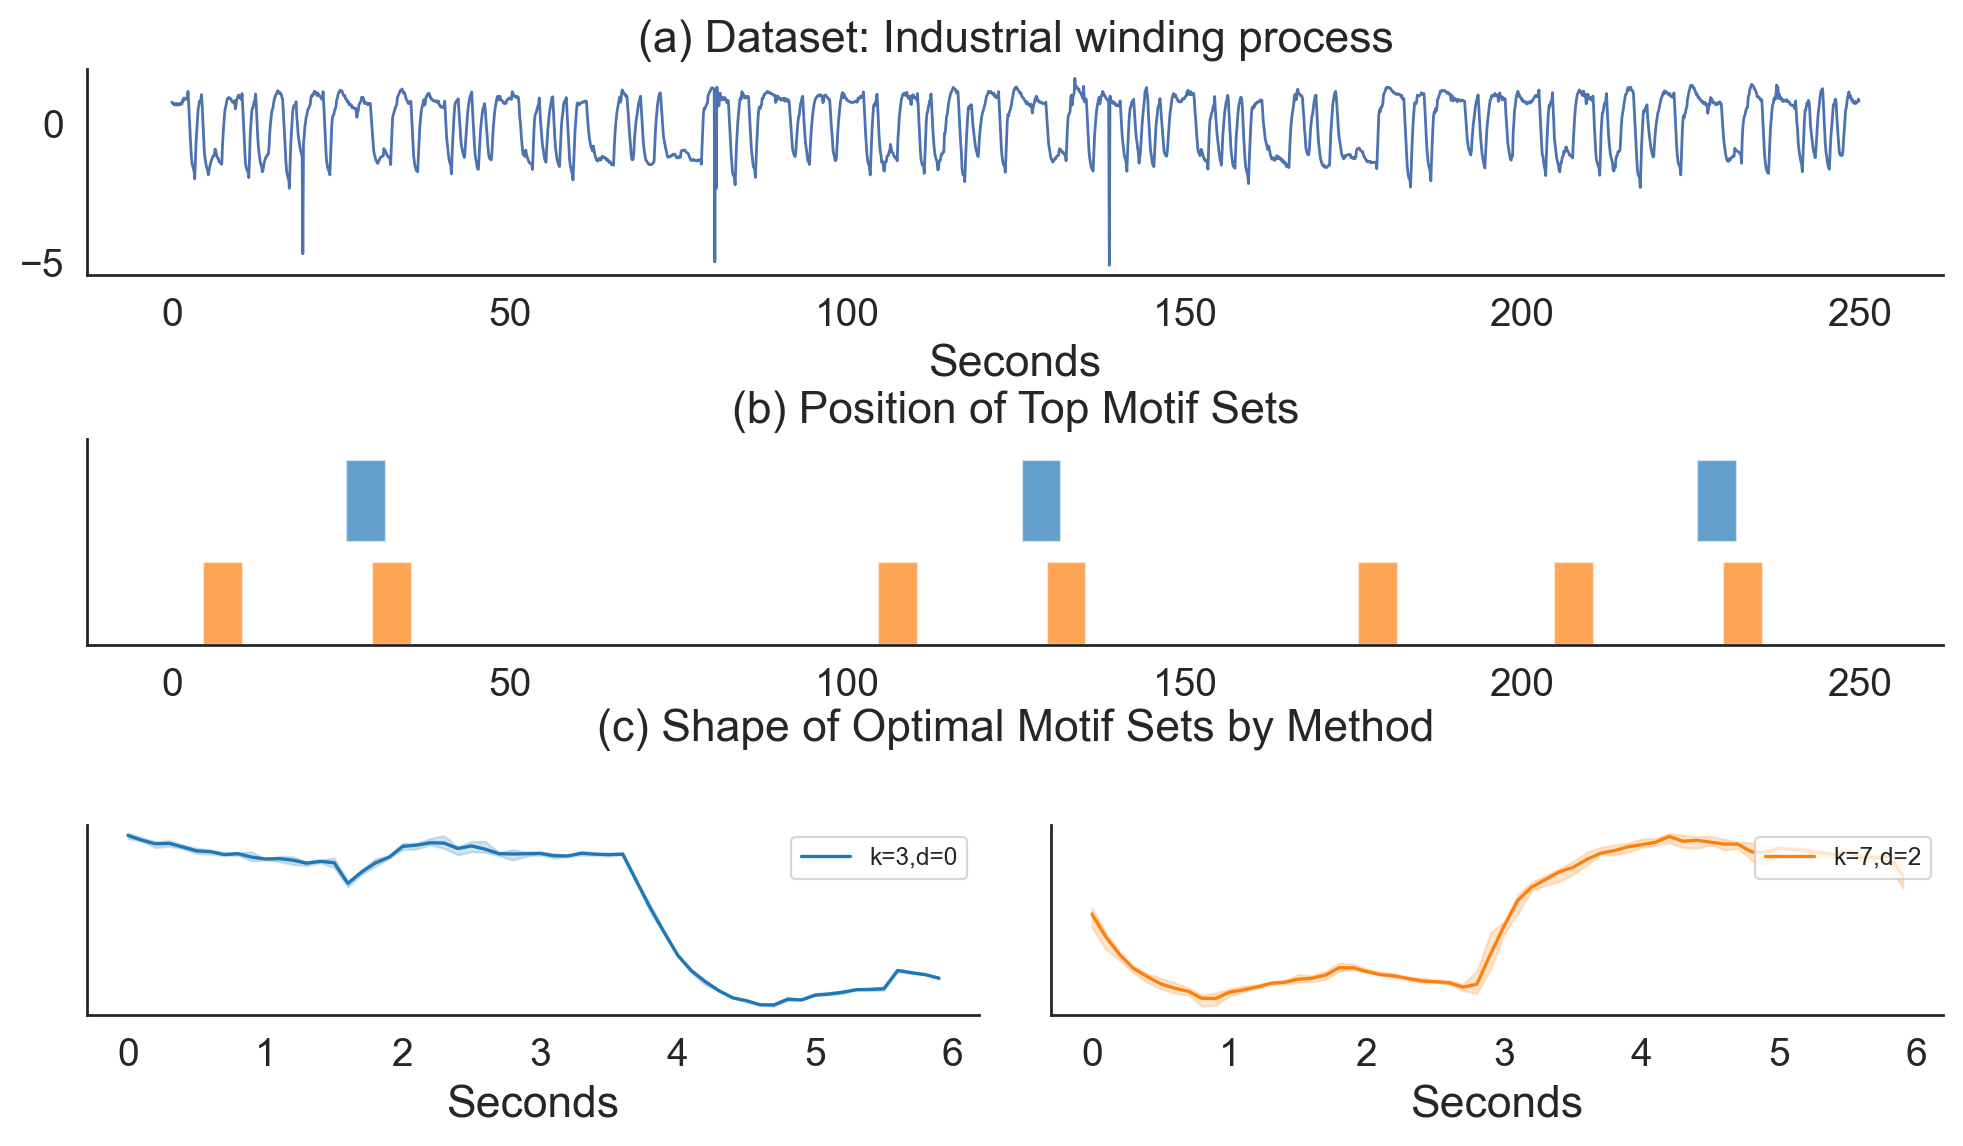

In [16]:
dists, candidates, elbow_points = ml.fit_k_elbow(ks, motif_length, exclusion=candidates)

<hr>

# Dataset: fNIRS Brain Imaging

Functional near-infrared spectroscopy (fNIRS) contains brain imaginary data recorded at $690nm$ intensity. There are $208.028$ measurements in total. The data is known to be a difficult example, as it contains four motion artifacts, due to movements of the patient, which dominate MD.

## References:
- [1] https://dl.acm.org/doi/pdf/10.1145/3097983.3097993

Dataset Original Length n:  10401
Dataset Sampled Length n:  10401


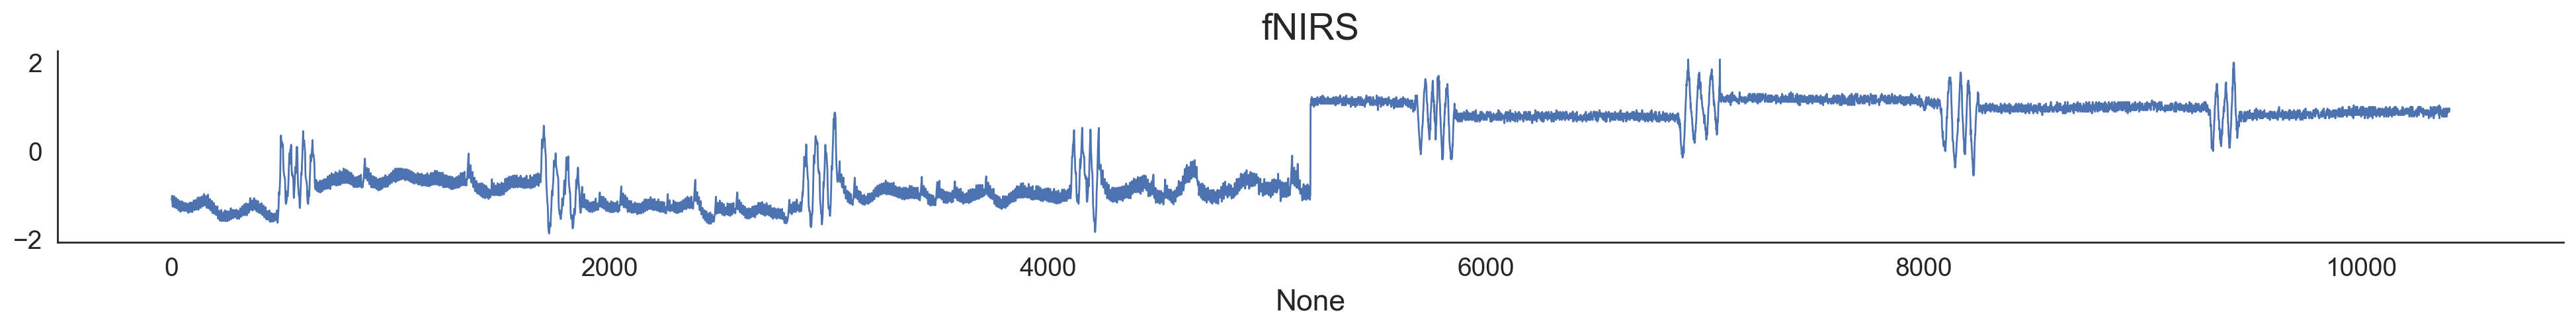

In [17]:
file = "fNIRS_subLen_600.csv" 
ds_name="fNIRS"
series = read_dataset_with_index(file) 

ml = Motiflets(ds_name, series)
fig, ax = ml.plot_dataset()

## Motif Length Selection

[/Users/runner/work/attimo/attimo/src/lsh.rs:756:17] estimated_collisions = 6213.75
[/Users/runner/work/attimo/attimo/src/lsh.rs:756:17] estimated_collisions = 6548.25
[/Users/runner/work/attimo/attimo/src/lsh.rs:756:17] estimated_collisions = 5231.75


	Time 3.9 s


[/Users/runner/work/attimo/attimo/src/lsh.rs:756:17] estimated_collisions = 4921.5
[/Users/runner/work/attimo/attimo/src/lsh.rs:756:17] estimated_collisions = 6189.5


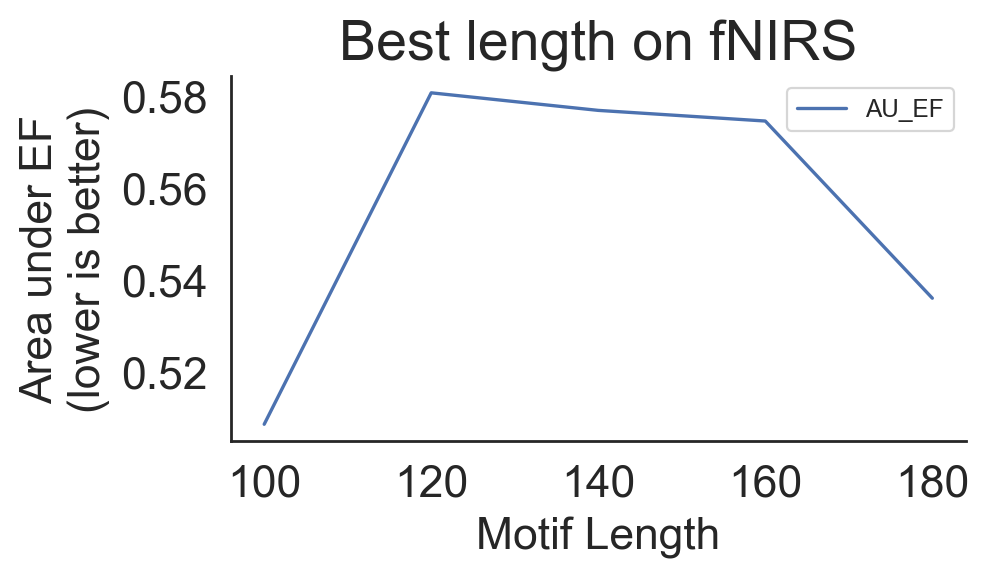

Found motif length 100


In [18]:
ks = 20
length_range = np.arange(100,200,20)
motif_length = ml.fit_motif_length(ks, length_range)

print ("Found motif length", series.index[motif_length])

# Top k-Motiflets

Data 10401
Chosen window-size: 100 in 2.2 s
Elbow Points [ 4 17]


[/Users/runner/work/attimo/attimo/src/lsh.rs:756:17] estimated_collisions = 6189.5


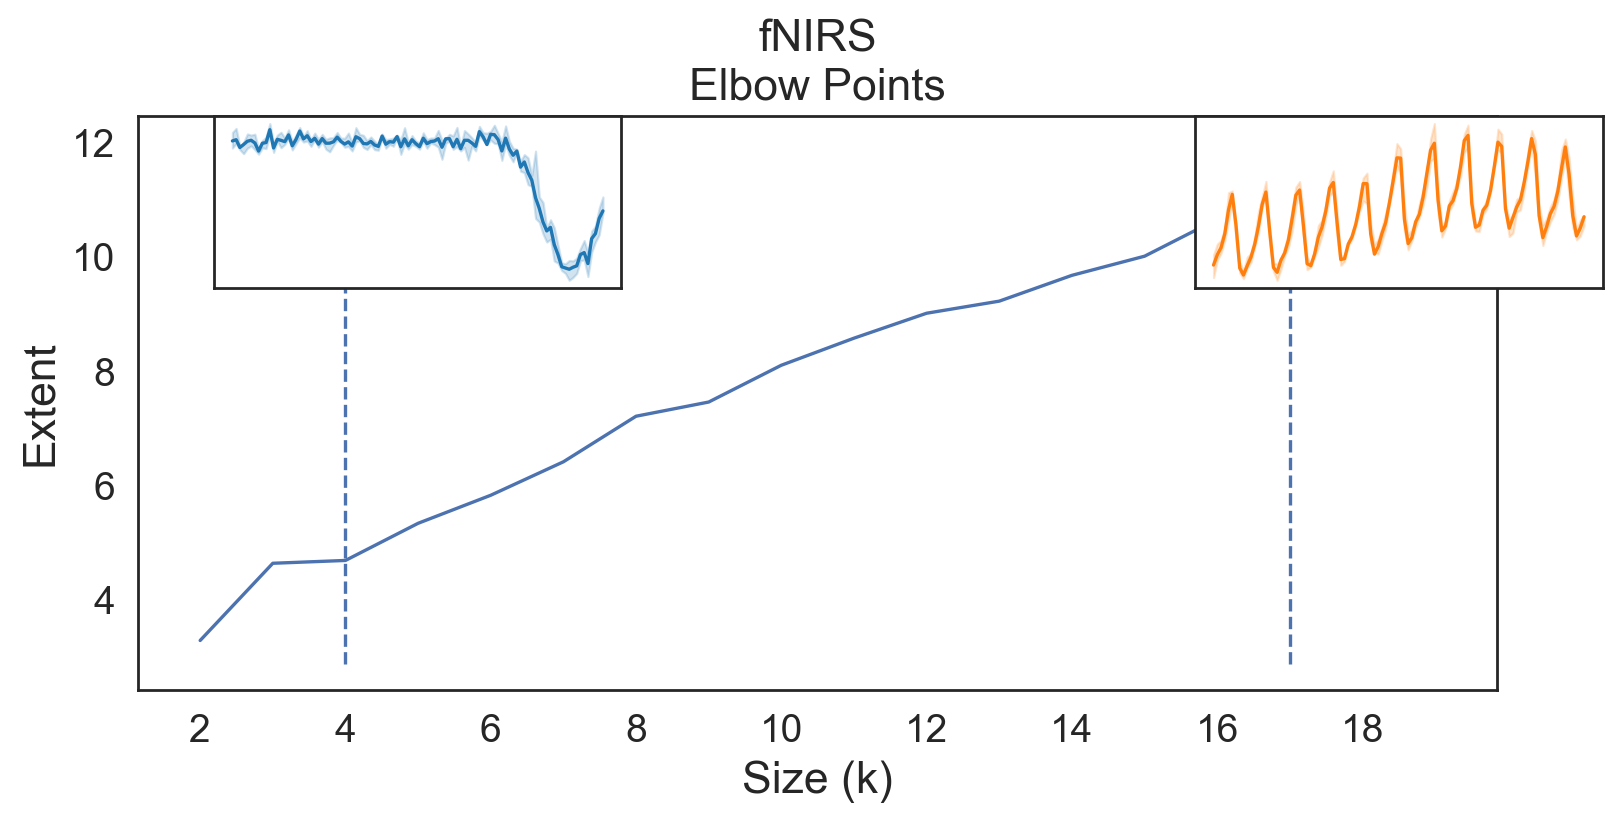

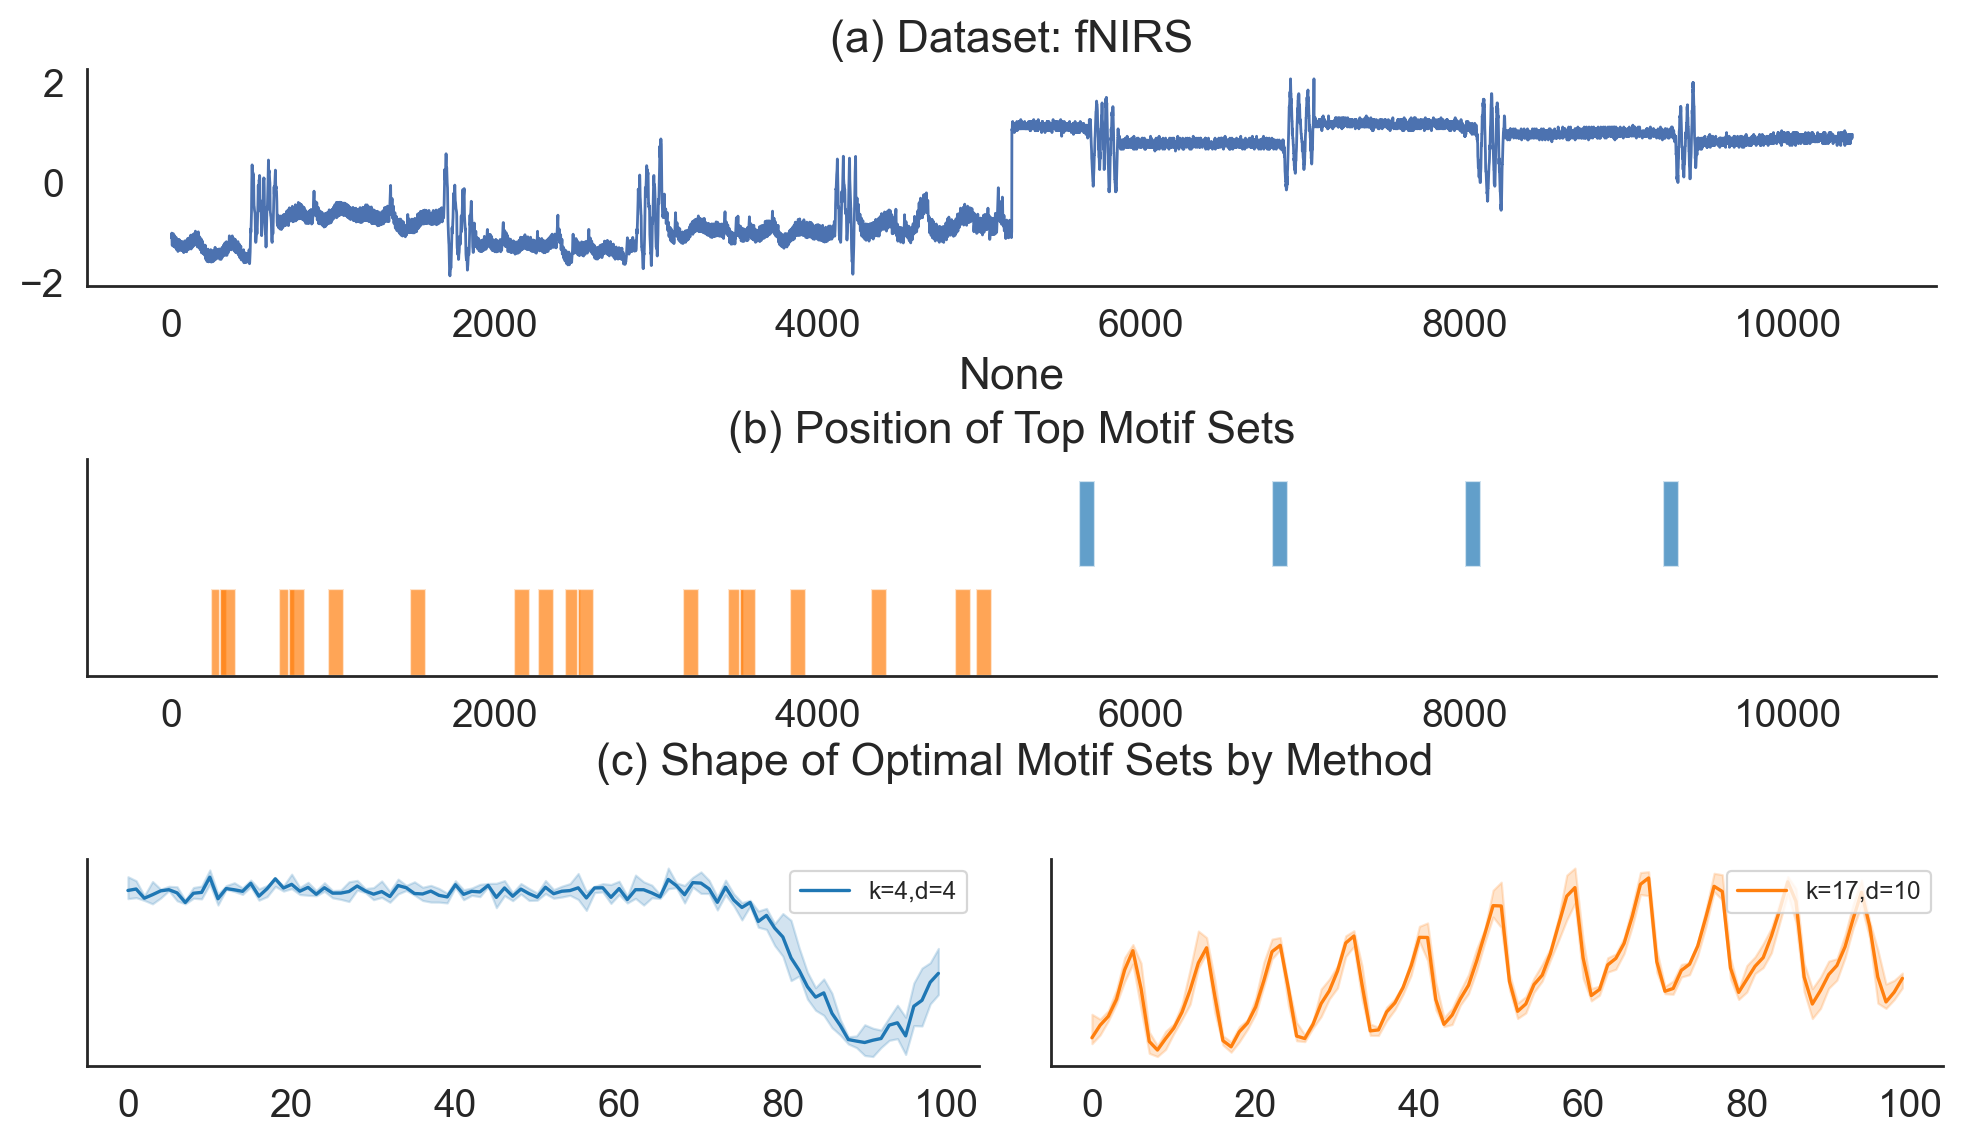

In [19]:
dists, candidates, elbow_points = ml.fit_k_elbow(ks, motif_length, filter=True)